# Introduction

<h1 style = 'color:#800080'> Expression Analysis of Industry Leaders using CNNs </h1>
<h3> A project by CNN: Convoluted Nerd Network <br>
Team Members: Aditya Doomra, Mansi Palekar, Hetansh Mehta and Nawang Bhutia </h3>
<br>

#### Introduction
Facial Expression Recognition is the task of classifying the expressions on face images into various classes such as anger, fear, surprise, sadness, happiness and so on. As part of the Final Project for the AI2 Course, the team - Mansi, Aditya, Hetansh and Nawang - undertook the challenge of building a Facial Expression Recognition algorithm that can accurately classify $6$ expressions, namely: Anger, Fear, Happiness, Neutral, Sadness and Surprise. <br>


The datasets used for building this model are: FER-2013 and CK+, The idea here is to apply the model trained on the aforementioned sets to the images generated by capturing stills from the *Top 20 TED Talks* from three categories: **STEM, Global Issues and Entertainment.**
<br>
<h4>
    This project is divided into 4 parts:<br>
    1. Building a model from scratch <br>
    2. Building a model using transfer learning <br>
    3. Model Interpretation and comparison<br>
    4. Building a dataset from the Top 20 TED Talks  <br>
    5. TED Talk Expression Analysis using Transfer Learning Model </h4> <br>

The datasets used for building this model are: FER-2013 and CK+

Link to the dataset FER-2013: https://www.kaggle.com/datasets/msambare/fer2013 <br>

Link to the dataset CK+: https://github.com/spenceryee/CS229 <br>

Link to project video: https://drive.google.com/file/d/1Er2Ep2eBM1uPjr3r8KosM342VhgWQyEv/view?usp=sharing

Link to project poster: https://drive.google.com/file/d/1gP3MwQdJZ5XnCTQl3Pg3MizwmKCbi7aS/view?usp=sharing

Link to project PPT: [drive link](https://docs.google.com/presentation/d/1MOV7lrh2wHJyxy6dJ-zR9SXs0x3zVkMG/edit?usp=sharing&ouid=105671815005676816769&rtpof=true&sd=true)

Link to custom made TED Talks stills dataset: https://drive.google.com/drive/folders/1YC-mEH6Gva-5Y4v10Pk2m1UnVgv-4kNb?usp=sharing

Link to all important CSV Files produced in the project: https://drive.google.com/drive/folders/1TMHm0vqI3y--2C7w1eSALSV9THX_7MKW?usp=sharing

#Imports

In [ ]:
import os
import numpy as np
import pandas as pd
import cv2
import time
import requests
import re
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
from sklearn.metrics import classification_report
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
from prettytable import PrettyTable

In [ ]:
!pip install tf_keras_vis
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 53 kB 1.7 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 9.8 MB/s 


In [ ]:
import random
random.seed(112358)

import os
import sys
import shutil

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

from glob import glob
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers 
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import tensorflow_addons as tfa
import tensorflow_datasets as tfds
from keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D, ZeroPadding2D, Activation  
from keras.models import Sequential
from tf_keras_vis.utils.model_modifiers import ExtractIntermediateLayer, ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize
from tf_keras_vis.gradcam import Gradcam

%matplotlib inline

In [ ]:
import bs4
from bs4 import BeautifulSoup
import webbrowser

In [ ]:
import random
random.seed(112358)

import os
import sys
import shutil

import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn

from glob import glob
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers 
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import tensorflow_addons as tfa
import tensorflow_datasets as tfds
from keras.layers import Dense, Flatten, Dropout
from keras.models import Sequential
from tf_keras_vis.utils.model_modifiers import ExtractIntermediateLayer, ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils import normalize
from tf_keras_vis.gradcam import Gradcam

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Modelling

## Building a Custom Model

### Loading the FER-2013 Dataset from Kaggle

In [ ]:
#Install kaggle
!pip install -q kaggle

In [ ]:
#Upload the kaggle.json file you just downloaded
!gdown 1G0hi8zSxPumcto48NZtTm6VhZnLwDxVh

Downloading...
From: https://drive.google.com/uc?id=1G0hi8zSxPumcto48NZtTm6VhZnLwDxVh
To: /content/kaggle.json
100% 70.0/70.0 [00:00<00:00, 95.1kB/s]


In [ ]:
#Make directory named kaggle 
!mkdir ~/.kaggle

In [ ]:
#Copy kaggle.json file there.
!cp kaggle.json ~/.kaggle/

In [ ]:
#change the permissions of the file
!chmod 600 ~/.kaggle/kaggle.json 

In [ ]:
#Downloading the dataset from Kaggle
!kaggle datasets download -d msambare/fer2013 -p ../data

 78% 47.0M/60.3M [00:00<00:00, 121MB/s]
100% 60.3M/60.3M [00:00<00:00, 141MB/s]


In [ ]:
#Unzip the root folder 
!unzip '../data/fer2013.zip' -d ../data

In [ ]:
#Excluding the disgust class from both train and test sets
shutil.rmtree('/data/train/disgust')
shutil.rmtree('/data/test/disgust')

### Data preparation, building the model and fitting it on the training data

In [ ]:
#Loading the data
train_path = '/data/train'
test_path = '/data/test'

datagen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2) 

train_generator = datagen.flow_from_directory(train_path, target_size = (96, 96),
                                              color_mode = 'rgb', class_mode = 'categorical', batch_size = 32, subset = 'training',
                                              shuffle = True)

validation_generator = datagen.flow_from_directory(train_path, target_size = (96, 96),
                                                   color_mode = 'rgb', class_mode = 'categorical', batch_size = 32, subset = 'validation')

test_generator = datagen.flow_from_directory(test_path, target_size = (96, 96),
                                             color_mode = 'rgb', class_mode = 'categorical', batch_size = 1,
                                             shuffle = False)

Found 22619 images belonging to 6 classes.
Found 5654 images belonging to 6 classes.
Found 7067 images belonging to 6 classes.


In [ ]:
#Labels
class_name = {0: 'angry', 1: 'fear', 2: 'happy', 3: 'neutral', 4: 'sad', 5: 'surprise'}

In [ ]:
# Model Architecture 
# Fixing the random seed
tf.random.set_seed(1)

inputs = keras.Input(shape = (96, 96, 3))

myl1_reg = regularizers.L1(l1 = 0.0001)

conv_1 =  layers.Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu', padding = 'same')(inputs)
conv_2 = layers.Conv2D(filters = 128, kernel_size = 3, strides = 1, activation = 'relu', padding = 'same')(conv_1)
maxpool_1 = layers.MaxPooling2D(pool_size = (2,2), padding = 'same')(conv_2)
conv_3 = layers.Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu', padding = 'same')(maxpool_1)
conv_4 = layers.Conv2D(filters = 128, kernel_size = 3, strides = 1, activation = 'linear', padding = 'same')(conv_3)
batch_norm_1 = layers.BatchNormalization()(conv_4)
activation_1 = layers.Activation(activation = 'relu')(batch_norm_1)
maxpool_2 = layers.MaxPooling2D(pool_size = (2,2), padding = 'same')(activation_1)
dropout_1 = layers.Dropout(0.2)(maxpool_2)
conv_5 = layers.Conv2D(filters = 64, kernel_size = 3, strides = 1, activation = 'relu', padding = 'same')(dropout_1)
conv_6 = layers.Conv2D(filters = 128, kernel_size = 3, strides = 1, activation = 'linear', padding = 'same')(conv_5)
batch_norm_2 = layers.BatchNormalization()(conv_6)
activation_2 = layers.Activation(activation = 'relu')(batch_norm_2)
maxpool_3 = layers.MaxPooling2D(pool_size = (2,2), padding = 'same')(activation_2)
dropout_2 = layers.Dropout(0.2)(maxpool_3)
flatten = layers.Flatten()(dropout_2)
hidden_1 = layers.Dense(100, kernel_regularizer = myl1_reg, activation = 'relu')(flatten)
dropout_2 = layers.Dropout(0.2)(hidden_1)
hidden_2 = layers.Dense(100, kernel_regularizer = myl1_reg, activation = 'relu')(dropout_2)
dropout_3 = layers.Dropout(0.2)(hidden_2)
hidden_3 = layers.Dense(100, kernel_regularizer = myl1_reg, activation = 'linear')(dropout_3)
batch_norm_3 = layers.BatchNormalization()(hidden_3)
activation_3 = layers.Activation(activation = 'relu')(batch_norm_3)
dropout_4 = layers.Dropout(0.2)(activation_3)
output = layers.Dense(6, activation = 'softmax')(dropout_4)

model1 = keras.Model(inputs = inputs, outputs = output, name = 'Custom_model')

model1.summary()

Model: "Custom_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 96, 96, 64)        1792      
                                                                 
 conv2d_7 (Conv2D)           (None, 96, 96, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 48, 48, 128)      0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 48, 48, 64)        73792     
                                                                 
 conv2d_9 (Conv2D)           (None, 48, 48, 128)       73856     
                                                      

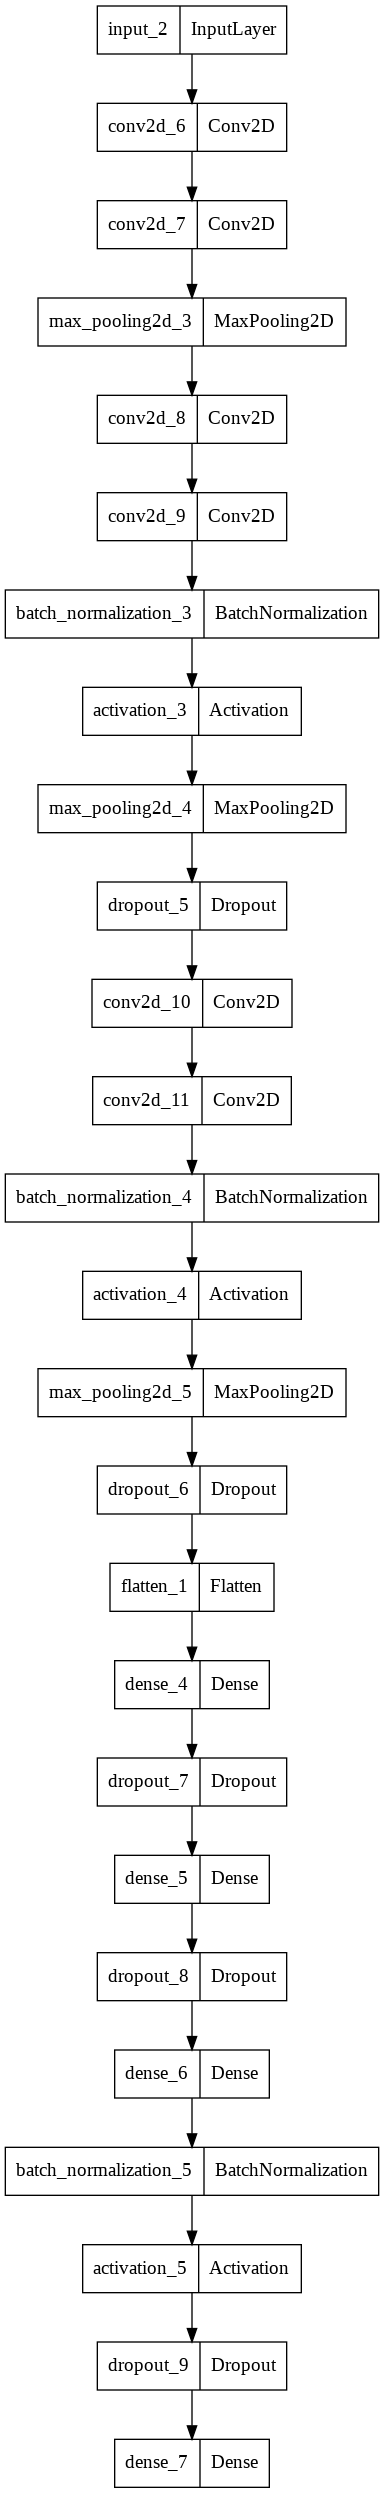

In [ ]:
#Plotting the model
tf.keras.utils.plot_model(model1)

In [ ]:
#Compiling the model
callback = tf.keras.callbacks.EarlyStopping(patience = 5, monitor = 'val_loss', restore_best_weights = True)

model1.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics = 'accuracy')

In [ ]:
#Fitting the model
history1 = model1.fit(train_generator, epochs = 20, batch_size = 32, validation_data = validation_generator, verbose = 1, callbacks = callback)

Epoch 1/20
707/707 [==============================] - 46s 63ms/step - loss: 3.4155 - accuracy: 0.2374 - val_loss: 2.9164 - val_accuracy: 0.3106
Epoch 2/20
707/707 [==============================] - 46s 66ms/step - loss: 2.7112 - accuracy: 0.3186 - val_loss: 2.3517 - val_accuracy: 0.4013
Epoch 3/20
707/707 [==============================] - 45s 64ms/step - loss: 2.2750 - accuracy: 0.3797 - val_loss: 2.0664 - val_accuracy: 0.4156
Epoch 4/20
707/707 [==============================] - 44s 62ms/step - loss: 1.9961 - accuracy: 0.4345 - val_loss: 1.8828 - val_accuracy: 0.4522
Epoch 5/20
707/707 [==============================] - 45s 63ms/step - loss: 1.8329 - accuracy: 0.4631 - val_loss: 1.8826 - val_accuracy: 0.4415
Epoch 6/20
707/707 [==============================] - 44s 63ms/step - loss: 1.7285 - accuracy: 0.4831 - val_loss: 1.6383 - val_accuracy: 0.5097
Epoch 7/20
707/707 [==============================] - 44s 62ms/step - loss: 1.6378 - accuracy: 0.5105 - val_loss: 1.5855 - val_accuracy:

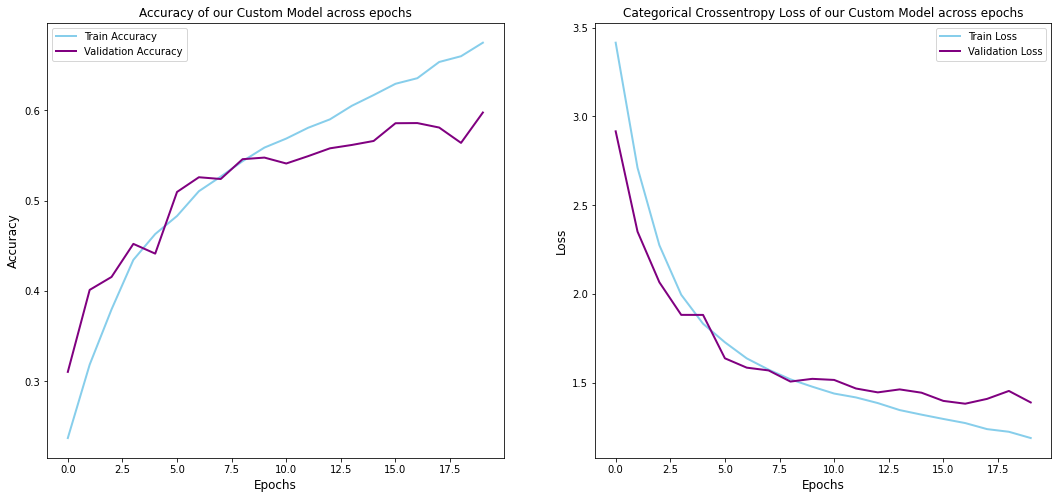

In [ ]:
#Plot the training and validation accuracy
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

ax[0].plot(history1.history['accuracy'], label = 'Train Accuracy', color = 'skyblue', linewidth = 2)
ax[0].plot(history1.history['val_accuracy'],  label = 'Validation Accuracy', color = 'purple', linewidth = 2)

# Set the axes labels
ax[0].set_xlabel('Epochs', fontsize = 12)
ax[0].set_ylabel('Accuracy', fontsize = 12)
ax[0].set_title('Accuracy of our Custom Model across epochs', fontsize = 12)
ax[0].legend()

# Plot the sparse_categorical_crossentropy loss of the model
ax[1].plot(history1.history['loss'], label = 'Train Loss', color = 'skyblue', linewidth = 2)
ax[1].plot(history1.history['val_loss'],  label = 'Validation Loss', color = 'purple', linewidth = 2)

# Set the axes labels
ax[1].set_xlabel('Epochs', fontsize = 12)
ax[1].set_ylabel('Loss', fontsize = 12)
ax[1].set_title('Categorical Crossentropy Loss of our Custom Model across epochs', fontsize = 12)
ax[1].legend()

plt.subplots_adjust(wspace = 0.2)
#plt.tight_layout()
plt.show()

In [ ]:
#Performance of the network across epochs 
train_accuracy1 = history1.history['accuracy']
val_accuracy1 = history1.history['val_accuracy']

train_loss1 = history1.history['loss']
val_loss1 = history1.history['loss']

model1_prog = pd.DataFrame(list(zip([i for i in range(1, len(train_accuracy1) + 1)],
                            train_loss1, train_accuracy1, val_loss1, val_accuracy1)),
                            columns =['No. of epoch', 'Train Loss', 'Train Accuracy', 'Validation Loss', 'Validation Accuracy'])
display(model1_prog)

No. of epoch  Train Loss  Train Accuracy  Validation Loss  \
0              1    3.415520        0.237367         3.415520   
1              2    2.711173        0.318582         2.711173   
2              3    2.275017        0.379681         2.275017   
3              4    1.996075        0.434546         1.996075   
4              5    1.832876        0.463106         1.832876   
5              6    1.728503        0.483134         1.728503   
6              7    1.637780        0.510544         1.637780   
7              8    1.574455        0.526725         1.574455   
8              9    1.519881        0.543746         1.519881   
9             10    1.478403        0.558822         1.478403   
10            11    1.439801        0.568814         1.439801   
11            12    1.417933        0.580751         1.417933   
12            13    1.386105        0.590079         1.386105   
13            14    1.346700        0.605067         1.346700   
14            15    1.320993        0.616959         1.320993   
15            16    1.296727        0.629427         1.296727   
16            17    1.273613        0.635616         1.273613   
17            18    1.239499        0.653566         1.239499   
18            19    1.224554        0.659932         1.224554   
19            20    1.189290        0.674919         1.189290   

    Validation Accuracy  
0              0.310577  
1              0.401309  
2              0.415635  
3              0.452246  
4              0.441457  
5              0.509728  
6              0.525999  
7              0.524054  
8              0.545985  
9              0.547754  
10             0.541210  
11             0.549346  
12             0.558012  
13             0.561726  
14             0.566148  
15             0.585780  
16             0.585957  
17             0.581005  
18             0.564025  
19             0.597630

### Model Evaluation

In [ ]:
#Evaluate the model on train, validation and test set
train_score1 = model1.evaluate(train_generator)
val_score1 = model1.evaluate(validation_generator)
test_score1 = model1.evaluate(test_generator)

7067/7067 [==============================] - 33s 5ms/step - loss: 1.3906 - accuracy: 0.6020


In [ ]:
#Summarising loss & accuracy for train, validation and test set
model1_scores = PrettyTable(['Set', 'Loss', 'Accuracy'])
  
# Add rows
model1_scores.add_row(['Train', f'{train_score1[0]:.4f}', f'{train_score1[1]:.2%}'])
model1_scores.add_row(['Validation', f'{val_score1[0]:.4f}', f'{val_score1[1]:.2%}'])
model1_scores.add_row(['Test', f'{test_score1[0]:.4f}', f'{test_score1[1]:.2%}'])

print('The loss and accuracies for the train, validation and test set are summarised below:\n')
print(model1_scores)

The loss and accuracies for the train, validation and test set are summarised below:

+------------+--------+----------+
|    Set     |  Loss  | Accuracy |
+------------+--------+----------+
|   Train    | 1.0338 |  75.10%  |
| Validation | 1.3897 |  59.76%  |
|    Test    | 1.3906 |  60.20%  |
+------------+--------+----------+


In [ ]:
#Predict on the test set
y_test_preds = model1.predict(test_generator)
y_pred = y_test_preds.argmax(axis = 1).astype(int)

#True labels
y_true = test_generator.labels.astype(int)

In [ ]:
#Classification Report
print(classification_report(y_true, y_pred, target_names = ['Angry', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']))

              precision    recall  f1-score   support

       Angry       0.54      0.44      0.48       958
        Fear       0.46      0.32      0.37      1024
       Happy       0.76      0.84      0.80      1774
     Neutral       0.56      0.59      0.57      1233
         Sad       0.46      0.53      0.49      1247
    Surprise       0.71      0.77      0.74       831

    accuracy                           0.60      7067
   macro avg       0.58      0.58      0.58      7067
weighted avg       0.59      0.60      0.59      7067



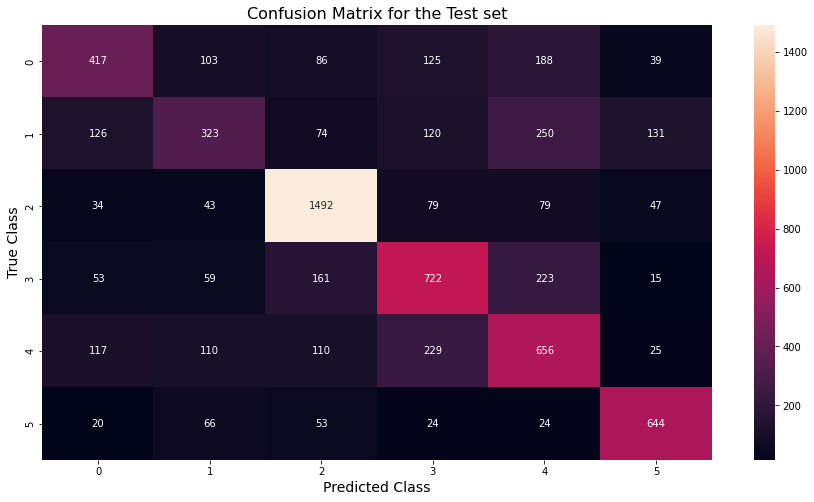

In [ ]:
#Confusion matrix for Test set
cf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize = (15, 8))
sns.heatmap(cf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted Class', fontsize = 14)
plt.ylabel('True Class', fontsize = 14)
plt.title('Confusion Matrix for the Test set', fontsize = 16)
plt.show()

## Building a Transfer Learning Model

### Loading the CK+ Dataset

In [ ]:
#Downloading
!gdown 1qsilVQk6qZtSDfr64t7Dt2CeH5PS9qQ6

Downloading...
From: https://drive.google.com/uc?id=1qsilVQk6qZtSDfr64t7Dt2CeH5PS9qQ6
To: /content/CK+ Dataset.zip
100% 129M/129M [00:00<00:00, 205MB/s]


In [ ]:
#Unzipping the contents
!unzip '/content/CK+ Dataset.zip' -d ../data

### Data preparation, building the model and fitting it on the training data

In [ ]:
data_path_train = '/data/CK+ Dataset'

#Loading the data

datagen2 = ImageDataGenerator(rescale = 1./255, validation_split = 0.15) 

train_generator2 = datagen2.flow_from_directory(data_path_train, target_size = (224, 224),
                                                color_mode = 'rgb', class_mode = 'categorical', batch_size = 8, subset = 'training', shuffle = False)

validation_generator2 = datagen2.flow_from_directory(data_path_train, target_size = (224, 224),
                                                     color_mode = 'rgb', class_mode = 'categorical', batch_size = 8, subset = 'validation', shuffle = False)

We will use the model VGGFace as our base model.
The architecture of this model and the weights were obtained from [Kaggle.](https://www.kaggle.com/code/vimalpillai/facial-recognition-using-vggface-keras/data)

In [ ]:
# Model Architecture 
# Fixing the random seed
tf.random.set_seed(1)

base_model = Sequential()
base_model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
base_model.add(Conv2D(64, (3, 3), activation='relu'))
base_model.add(ZeroPadding2D((1,1)))
base_model.add(Conv2D(64, (3, 3), activation='relu'))
base_model.add(MaxPooling2D((2,2), strides=(2,2)))

base_model.add(ZeroPadding2D((1,1)))
base_model.add(Conv2D(128, (3, 3), activation='relu'))
base_model.add(ZeroPadding2D((1,1)))
base_model.add(Conv2D(128, (3, 3), activation='relu'))
base_model.add(MaxPooling2D((2,2), strides=(2,2)))

base_model.add(ZeroPadding2D((1,1)))
base_model.add(Conv2D(256, (3, 3), activation='relu'))
base_model.add(ZeroPadding2D((1,1)))
base_model.add(Conv2D(256, (3, 3), activation='relu'))
base_model.add(ZeroPadding2D((1,1)))
base_model.add(Conv2D(256, (3, 3), activation='relu'))
base_model.add(MaxPooling2D((2,2), strides=(2,2)))

base_model.add(ZeroPadding2D((1,1)))
base_model.add(Conv2D(512, (3, 3), activation='relu'))
base_model.add(ZeroPadding2D((1,1)))
base_model.add(Conv2D(512, (3, 3), activation='relu'))
base_model.add(ZeroPadding2D((1,1)))
base_model.add(Conv2D(512, (3, 3), activation='relu'))
base_model.add(MaxPooling2D((2,2), strides=(2,2)))

base_model.add(ZeroPadding2D((1,1)))
base_model.add(Conv2D(512, (3, 3), activation='relu'))
base_model.add(ZeroPadding2D((1,1)))
base_model.add(Conv2D(512, (3, 3), activation='relu'))
base_model.add(ZeroPadding2D((1,1)))
base_model.add(Conv2D(512, (3, 3), activation='relu'))
base_model.add(MaxPooling2D((2,2), strides=(2,2)))

base_model.add(Conv2D(4096, (7, 7), activation='relu'))
base_model.add(Dropout(0.5))
base_model.add(Conv2D(4096, (1, 1), activation='relu'))
base_model.add(Dropout(0.5))
base_model.add(Conv2D(2622, (1, 1)))
base_model.add(Flatten())
base_model.add(Activation('softmax'))

base_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_13 (ZeroPadd  (None, 226, 226, 3)      0         
 ing2D)                                                          
                                                                 
 conv2d_16 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 zero_padding2d_14 (ZeroPadd  (None, 226, 226, 64)     0         
 ing2D)                                                          
                                                                 
 conv2d_17 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                      

In [ ]:
#Loading the weights
base_model.load_weights('/content/vgg_face_weights.h5')

In [ ]:
# Freezing the weights of the base model 
for layers in base_model.layers:
  layers.trainable = False 

In [ ]:
#Building a model using VGGFace
x = base_model.output
x = Dense(1024, activation = 'relu')(x)
x = Dense(128, activation = 'relu')(x)
preds = Dense(6, activation='softmax')(x) 

model2 = keras.models.Model(inputs = base_model.input, outputs = preds, name = 'VGGFace_Model')

In [ ]:
#Print the summary of the model
model2.summary()

Model: "VGGFace_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d_13_input (In  [(None, 224, 224, 3)]    0         
 putLayer)                                                       
                                                                 
 zero_padding2d_13 (ZeroPadd  (None, 226, 226, 3)      0         
 ing2D)                                                          
                                                                 
 conv2d_16 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 zero_padding2d_14 (ZeroPadd  (None, 226, 226, 64)     0         
 ing2D)                                                          
                                                                 
 conv2d_17 (Conv2D)          (None, 224, 224, 64)      36928     
                                                     

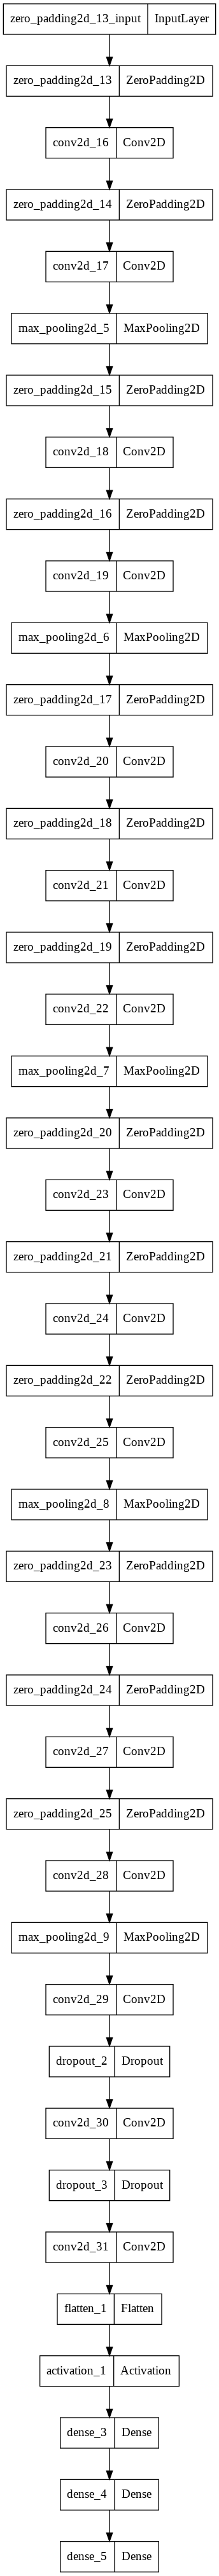

In [ ]:
#Plotting the model
tf.keras.utils.plot_model(model2)

In [ ]:
#Compiling the model

callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, restore_best_weights= True)
model2.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics = 'accuracy')

In [ ]:
#Fitting the model
history2 = model2.fit(train_generator2, epochs = 10, batch_size = 8, validation_data = validation_generator2, verbose = 1, callbacks = callback)

Epoch 1/10
90/90 [==============================] - 17s 162ms/step - loss: 1.7368 - accuracy: 0.6903 - val_loss: 1.6452 - val_accuracy: 0.7154
Epoch 2/10
90/90 [==============================] - 13s 145ms/step - loss: 1.4958 - accuracy: 0.7014 - val_loss: 1.3138 - val_accuracy: 0.7154
Epoch 3/10
90/90 [==============================] - 13s 145ms/step - loss: 1.2037 - accuracy: 0.7014 - val_loss: 1.0871 - val_accuracy: 0.7154
Epoch 4/10
90/90 [==============================] - 13s 144ms/step - loss: 1.1017 - accuracy: 0.7014 - val_loss: 1.0493 - val_accuracy: 0.7154
Epoch 5/10
90/90 [==============================] - 13s 144ms/step - loss: 1.0852 - accuracy: 0.7014 - val_loss: 1.0425 - val_accuracy: 0.7154
Epoch 6/10
90/90 [==============================] - 13s 143ms/step - loss: 1.0811 - accuracy: 0.7014 - val_loss: 1.0405 - val_accuracy: 0.7154
Epoch 7/10
90/90 [==============================] - 13s 143ms/step - loss: 1.0787 - accuracy: 0.7014 - val_loss: 1.0367 - val_accuracy: 0.7154

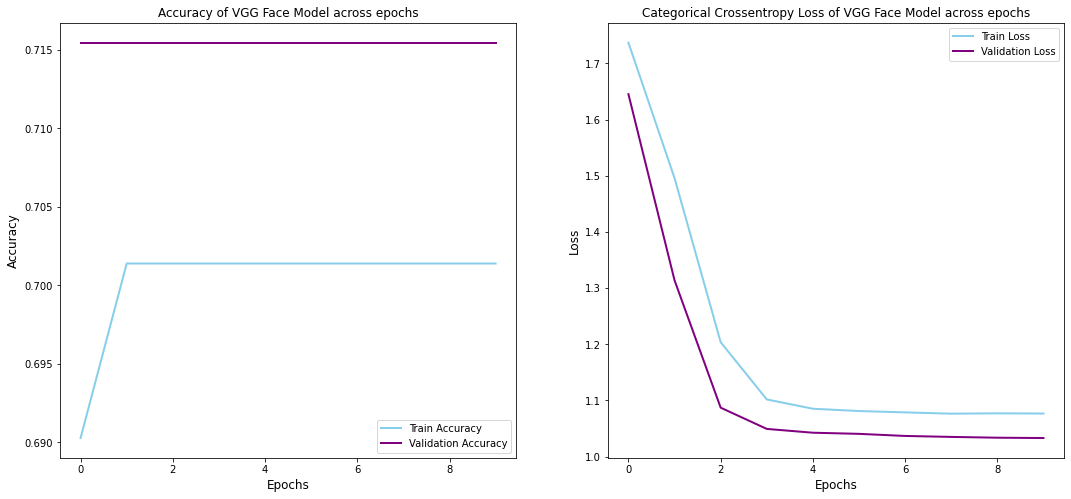

In [ ]:
#Plot the training and validation accuracy
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

ax[0].plot(history2.history['accuracy'], label = 'Train Accuracy', color = 'skyblue', linewidth = 2)
ax[0].plot(history2.history['val_accuracy'],  label = 'Validation Accuracy', color = 'purple', linewidth = 2)

# Set the axes labels
ax[0].set_xlabel('Epochs', fontsize = 12)
ax[0].set_ylabel('Accuracy', fontsize = 12)
ax[0].set_title('Accuracy of VGG Face Model across epochs', fontsize = 12)
ax[0].legend()

# Plot the sparse_categorical_crossentropy loss of the model
ax[1].plot(history2.history['loss'], label = 'Train Loss', color = 'skyblue', linewidth = 2)
ax[1].plot(history2.history['val_loss'],  label = 'Validation Loss', color = 'purple', linewidth = 2)

# Set the axes labels
ax[1].set_xlabel('Epochs', fontsize = 12)
ax[1].set_ylabel('Loss', fontsize = 12)
ax[1].set_title('Categorical Crossentropy Loss of VGG Face Model across epochs', fontsize = 12)
ax[1].legend()

plt.subplots_adjust(wspace = 0.2)
#plt.tight_layout()
plt.show()

### Model Evaluation and Comparison

In [ ]:
#Evaluate the model on train and validation
train_score2 = model2.evaluate(train_generator2)
val_score2 = model2.evaluate(validation_generator2)

In [ ]:
#Printing out the loss & accuracy
print('The training loss for the transfer learning model is : ', str(round(train_score2[0], 4)))
print('The training accuracy for the transfer learning model is : ',str(round(train_score2[1], 4)))
print('The validation loss for the transfer learning model is : ', str(round(val_score2[0], 4)))
print('The validation accuracy for the transfer learning model is : ', str(round(val_score2[1], 4)))

The training loss for the transfer learning model is :  1.0673
The training accuracy for the transfer learning model is :  0.7014
The validation loss for the transfer learning model is :  1.0313
The validation accuracy for the transfer learning model is :  0.7154


In [ ]:
#Comparison of models
summary = PrettyTable(['Model Name','No. of layers', 'Total Parameters', 'Trainable Parameters'])

summary.add_row(['Custom Model', str(len(model1.layers)), str(model1.count_params()), '2,235,762'])
summary.add_row(['VGG Face', str(len(model2.layers)), str(model2.count_params()), '2,817,926'])  

summary.title = 'Model comparison'
print(summary)

+------------------------------------------------------------------------+
|                            Model comparison                            |
+--------------+---------------+------------------+----------------------+
|  Model Name  | No. of layers | Total Parameters | Trainable Parameters |
+--------------+---------------+------------------+----------------------+
| Custom Model |       26      |     2236474      |      2,235,762       |
|   VGG Face   |       42      |    147820804     |      2,817,926       |
+--------------+---------------+------------------+----------------------+


# Model Interpretation of Custom Model

To interpret our custom model, we'll make use of Feature maps, Saliency maps, and Grad-CAM maps. <br>
First, we'll obtain the indexes of the images in the Test set for which, the predictions of our model were correct.

In [ ]:
#Check
pred_check = (y_pred == y_true).astype(int)
correct_pred_idx = [i for i, j in enumerate(pred_check) if j == 1]
wrong_pred_idx = [i for i, j in enumerate(pred_check) if j == 0]

#Obtaining the indexes class wise
pred_check_angry = np.where((pred_check == 1) & (y_true == 0))[0]
pred_check_fear = np.where((pred_check == 1) & (y_true == 1))[0]
pred_check_happy = np.where((pred_check == 1) & (y_true == 2))[0]
pred_check_neutral = np.where((pred_check == 1) & (y_true == 3))[0]
pred_check_sad = np.where((pred_check == 1) & (y_true == 4))[0]
pred_check_surprise = np.where((pred_check == 1) & (y_true == 5))[0]

In [ ]:
#Choosing a correct index for each class based on which we'll make our plots
cidx_0 = np.random.choice(pred_check_angry, size = 1)[0]
cidx_1 = np.random.choice(pred_check_fear, size = 1)[0]
cidx_2 = np.random.choice(pred_check_happy, size = 1)[0]
cidx_3 = np.random.choice(pred_check_neutral, size = 1)[0]
cidx_4 = np.random.choice(pred_check_sad, size = 1)[0]
cidx_5 = np.random.choice(pred_check_surprise, size = 1)[0]
cindex = [cidx_0, cidx_1, cidx_2, cidx_3, cidx_4, cidx_5]

images, true_labels, pred_labels, class_names = [], [], [], []
for idx in cindex:
  images.append(test_generator[idx][0])
  true_labels.append(np.argmax(test_generator[idx][1], axis = 1)[0])
  pred_labels.append(y_pred[idx])
  class_names.append(class_name[np.argmax(test_generator[idx][1], axis = 1)[0]])

#### Feature Maps

In [ ]:
def get_feature_maps(model, layer_id, input_image):
    """Returns intermediate output (activation map) from passing an image to the model
    
    Parameters:
        model (tf.keras.Model): Model to examine
        layer_id (int): Which layer's (from zero) output to return
        input_image (ndarray): The input image
    Returns:
        maps (List[ndarray]): Feature map stack output by the specified layer
    """
    model_ = tf.keras.models.Model(inputs=[model.input], outputs=[model.layers[layer_id].output])
    return model_.predict(input_image)

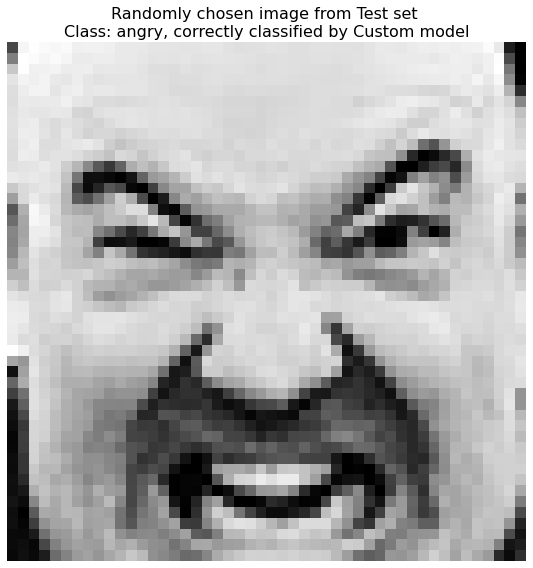

In [ ]:
#Choose an intermediate layer from which to extract feature maps
layer_id = 4

#Reshaping the image and getting the feature maps
image = images[0].reshape(-1,96,96,3)
feature_maps = get_feature_maps(model1, layer_id, image)

#Plotting
fig, ax = plt.subplots(1,1, figsize=(8, 8))

ax.imshow(image.reshape(96, 96, 3), label = 'Original Image')
ax.set_title(f'Randomly chosen image from Test set \nClass: {class_names[0]}, correctly classified by Custom model', fontsize = 16)
ax.grid(visible = None)
ax.axis('off')
plt.tight_layout()

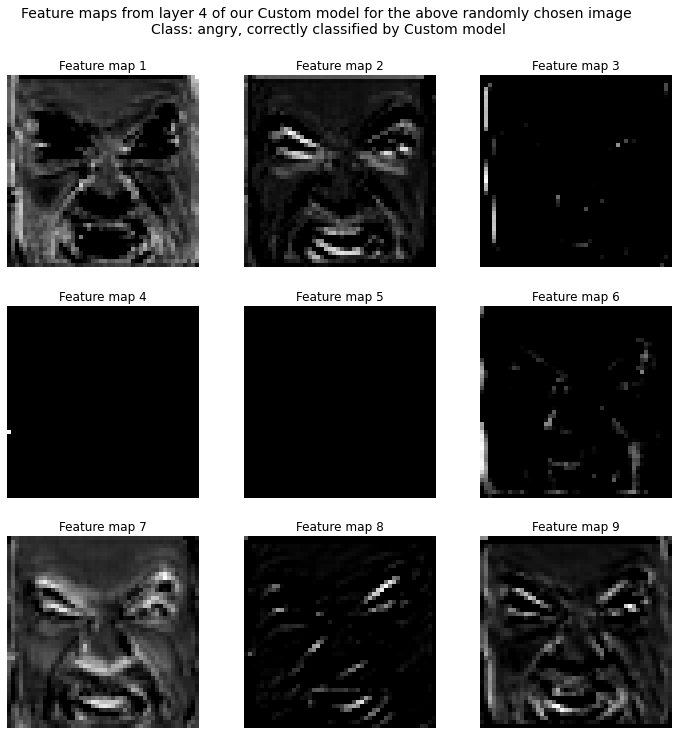

In [ ]:
#Plotting feature maps
fig, ax = plt.subplots(3,3, figsize=(12, 12))

for i, axis in enumerate(ax.ravel()):
        axis.imshow(feature_maps[0].squeeze()[:,:,i], cmap='gray')
        axis.set_title(f'Feature map {i+1}')
        axis.grid(visible = None)
        axis.axis('off')

plt.suptitle(f'Feature maps from layer {layer_id} of our Custom model for the above randomly chosen image \nClass: {class_name[0]}, correctly classified by Custom model',
             fontsize = 14, y = 0.96)
plt.subplots_adjust(wspace = 0.2, hspace = 0.2)

#### Saliency and Grad-CAM maps for correctly classified images

Now, we'll plot the Saliency maps and Grad-CAM maps of images that were classified correctly. We'll use one image from each expression class.

In [ ]:
# Create Saliency and gradcam objects.
saliency = Saliency(model = model1, model_modifier = ReplaceToLinear(), clone = True)
gradcam = Gradcam(model = model1, model_modifier = ReplaceToLinear(), clone = True)

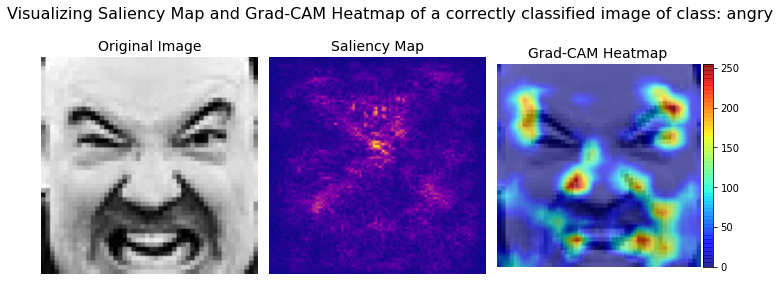

In [ ]:
#Class angry
score = CategoricalScore([true_labels[0]])
saliency_map = saliency(score, images[0].reshape(96, 96, 3))
cam = gradcam(score, images[0].reshape(96, 96, 3), penultimate_layer=-1)
heatmap = np.uint8(cm.jet(cam[0])[..., :3] * 255)

#Plotting the saliency and Grad-CAM maps
fig, ax = plt.subplots(1,3, figsize=(10, 10))
divider = make_axes_locatable(ax[2])
cax = divider.append_axes('right', size='5%', pad=0.05)

ax[0].imshow(images[0].reshape(96, 96, 3), label = 'Original Image')
ax[0].grid(visible = None)
ax[0].axis('off')
ax[0].set_title('Original Image', fontsize = 14)

ax[1].imshow(saliency_map[0], cmap='plasma')
ax[1].grid(visible = None)
ax[1].axis('off')
ax[1].set_title('Saliency Map', fontsize = 14)

ax[2].imshow(images[0].reshape(96, 96, 3))
hm = ax[2].imshow(heatmap, cmap = 'jet', alpha = 0.6)
fig.colorbar(hm, cax = cax)
ax[2].grid(visible = None)
ax[2].axis('off')
ax[2].set_title('Grad-CAM Heatmap', fontsize = 14)

fig.suptitle(f'Visualizing Saliency Map and Grad-CAM Heatmap of a correctly classified image of class: {class_names[0]}', y = 0.72, fontsize = 16)
plt.tight_layout()

**Inference:** The model is focusing on the furrowed eyebrows along with downturned features to detect anger.

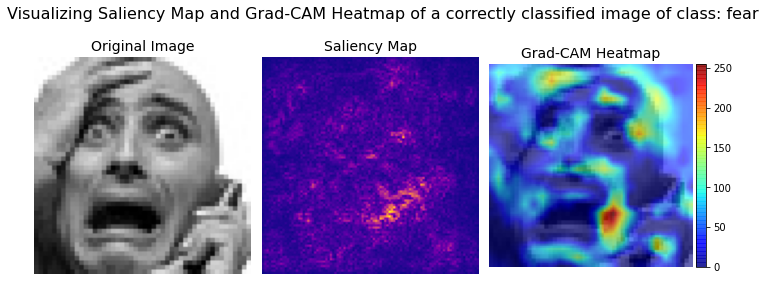

In [ ]:
#Class fear
score = CategoricalScore([true_labels[1]])
saliency_map = saliency(score, images[1].reshape(96, 96, 3))
cam = gradcam(score, images[1].reshape(96, 96, 3), penultimate_layer=-1)
heatmap = np.uint8(cm.jet(cam[0])[..., :3] * 255)

#Plotting the saliency and Grad-CAM maps
fig, ax = plt.subplots(1,3, figsize=(10, 10))
divider = make_axes_locatable(ax[2])
cax = divider.append_axes('right', size='5%', pad=0.05)

ax[0].imshow(images[1].reshape(96, 96, 3), label = 'Original Image')
ax[0].grid(visible = None)
ax[0].axis('off')
ax[0].set_title('Original Image', fontsize = 14)

ax[1].imshow(saliency_map[0], cmap='plasma')
ax[1].grid(visible = None)
ax[1].axis('off')
ax[1].set_title('Saliency Map', fontsize = 14)

ax[2].imshow(images[1].reshape(96, 96, 3))
hm = ax[2].imshow(heatmap, cmap = 'jet', alpha = 0.6)
fig.colorbar(hm, cax = cax)
ax[2].grid(visible = None)
ax[2].axis('off')
ax[2].set_title('Grad-CAM Heatmap', fontsize = 14)

fig.suptitle(f'Visualizing Saliency Map and Grad-CAM Heatmap of a correctly classified image of class: {class_names[1]}', y = 0.72, fontsize = 16)
plt.tight_layout()

**Inference:** While not exactly clear from the Grad-CAM, an open mouth could be a possible indicator for this class.

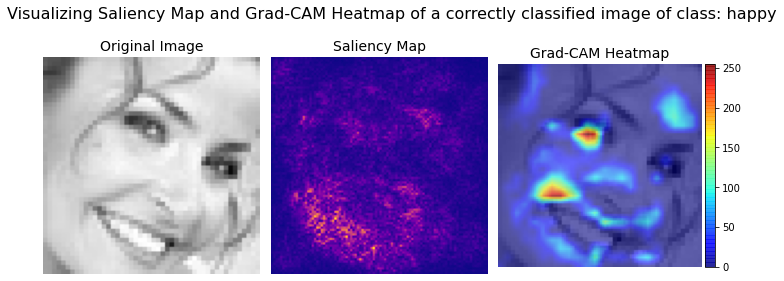

In [ ]:
#Class happy
score = CategoricalScore([true_labels[2]])
saliency_map = saliency(score, images[2].reshape(96, 96, 3))
cam = gradcam(score, images[2].reshape(96, 96, 3), penultimate_layer=-1)
heatmap = np.uint8(cm.jet(cam[0])[..., :3] * 255)

#Plotting the saliency and Grad-CAM maps
fig, ax = plt.subplots(1,3, figsize=(10, 10))
divider = make_axes_locatable(ax[2])
cax = divider.append_axes('right', size='5%', pad=0.05)

ax[0].imshow(images[2].reshape(96, 96, 3), label = 'Original Image')
ax[0].grid(visible = None)
ax[0].axis('off')
ax[0].set_title('Original Image', fontsize = 14)

ax[1].imshow(saliency_map[0], cmap='plasma')
ax[1].grid(visible = None)
ax[1].axis('off')
ax[1].set_title('Saliency Map', fontsize = 14)

ax[2].imshow(images[2].reshape(96, 96, 3))
hm = ax[2].imshow(heatmap, cmap = 'jet', alpha = 0.6)
fig.colorbar(hm, cax = cax)
ax[2].grid(visible = None)
ax[2].axis('off')
ax[2].set_title('Grad-CAM Heatmap', fontsize = 14)

fig.suptitle(f'Visualizing Saliency Map and Grad-CAM Heatmap of a correctly classified image of class: {class_names[2]}', y = 0.72, fontsize = 16)
plt.tight_layout()

**Inference:** The model could be possibly focusing on the curve of a smile.

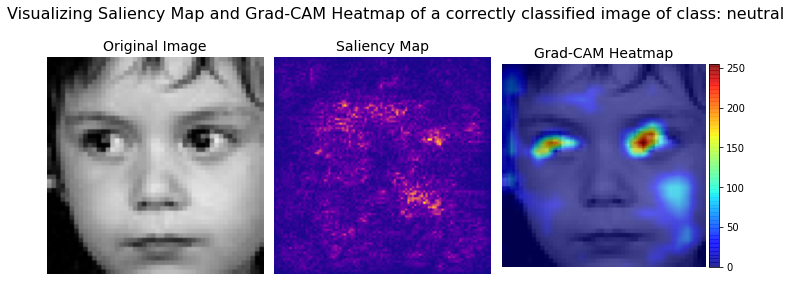

In [ ]:
#Class neutral
score = CategoricalScore([true_labels[3]])
saliency_map = saliency(score, images[3].reshape(96, 96, 3))
cam = gradcam(score, images[3].reshape(96, 96, 3), penultimate_layer=-1)
heatmap = np.uint8(cm.jet(cam[0])[..., :3] * 255)

#Plotting the saliency and Grad-CAM maps
fig, ax = plt.subplots(1,3, figsize=(10, 10))
divider = make_axes_locatable(ax[2])
cax = divider.append_axes('right', size='5%', pad=0.05)

ax[0].imshow(images[3].reshape(96, 96, 3), label = 'Original Image')
ax[0].grid(visible = None)
ax[0].axis('off')
ax[0].set_title('Original Image', fontsize = 14)

ax[1].imshow(saliency_map[0], cmap='plasma')
ax[1].grid(visible = None)
ax[1].axis('off')
ax[1].set_title('Saliency Map', fontsize = 14)

ax[2].imshow(images[3].reshape(96, 96, 3))
hm = ax[2].imshow(heatmap, cmap = 'jet', alpha = 0.6)
fig.colorbar(hm, cax = cax)
ax[2].grid(visible = None)
ax[2].axis('off')
ax[2].set_title('Grad-CAM Heatmap', fontsize = 14)

fig.suptitle(f'Visualizing Saliency Map and Grad-CAM Heatmap of a correctly classified image of class: {class_names[3]}', y = 0.72, fontsize = 16)
plt.tight_layout()

**Inference:** The model is focusing on the eyes and the lack of anything else like an open mouth or a curved smile is being considered neutral.

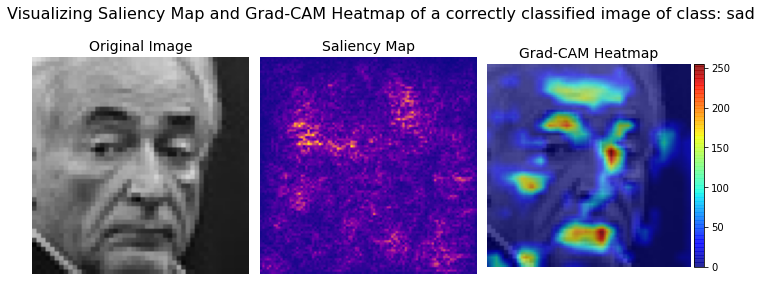

In [ ]:
#Class sad
score = CategoricalScore([true_labels[4]])
saliency_map = saliency(score, images[4].reshape(96, 96, 3))
cam = gradcam(score, images[4].reshape(96, 96, 3), penultimate_layer=-1)
heatmap = np.uint8(cm.jet(cam[0])[..., :3] * 255)

#Plotting the saliency and Grad-CAM maps
fig, ax = plt.subplots(1,3, figsize=(10, 10))
divider = make_axes_locatable(ax[2])
cax = divider.append_axes('right', size='5%', pad=0.05)

ax[0].imshow(images[4].reshape(96, 96, 3), label = 'Original Image')
ax[0].grid(visible = None)
ax[0].axis('off')
ax[0].set_title('Original Image', fontsize = 14)

ax[1].imshow(saliency_map[0], cmap='plasma')
ax[1].grid(visible = None)
ax[1].axis('off')
ax[1].set_title('Saliency Map', fontsize = 14)

ax[2].imshow(images[4].reshape(96, 96, 3))
hm = ax[2].imshow(heatmap, cmap = 'jet', alpha = 0.6)
fig.colorbar(hm, cax = cax)
ax[2].grid(visible = None)
ax[2].axis('off')
ax[2].set_title('Grad-CAM Heatmap', fontsize = 14)

fig.suptitle(f'Visualizing Saliency Map and Grad-CAM Heatmap of a correctly classified image of class: {class_names[4]}', y = 0.72, fontsize = 16)
plt.tight_layout()

**Inference:** The model is focusing on the downturned mouth.

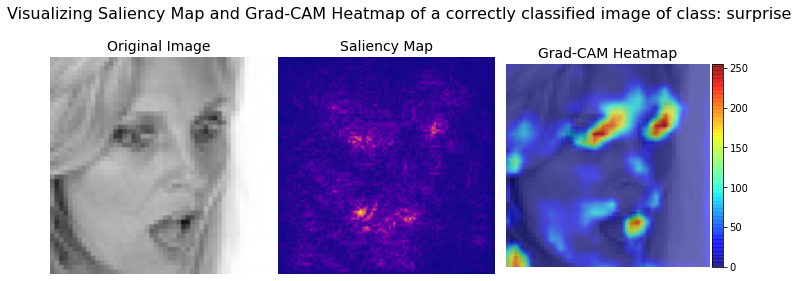

In [ ]:
#Class surprise
score = CategoricalScore([true_labels[5]])
saliency_map = saliency(score, images[5].reshape(96, 96, 3))
cam = gradcam(score, images[5].reshape(96, 96, 3), penultimate_layer=-1)
heatmap = np.uint8(cm.jet(cam[0])[..., :3] * 255)

#Plotting the saliency and Grad-CAM maps
fig, ax = plt.subplots(1,3, figsize=(10, 10))
divider = make_axes_locatable(ax[2])
cax = divider.append_axes('right', size='5%', pad=0.05)

ax[0].imshow(images[5].reshape(96, 96, 3), label = 'Original Image')
ax[0].grid(visible = None)
ax[0].axis('off')
ax[0].set_title('Original Image', fontsize = 14)

ax[1].imshow(saliency_map[0], cmap='plasma')
ax[1].grid(visible = None)
ax[1].axis('off')
ax[1].set_title('Saliency Map', fontsize = 14)

ax[2].imshow(images[5].reshape(96, 96, 3))
hm = ax[2].imshow(heatmap, cmap = 'jet', alpha = 0.6)
fig.colorbar(hm, cax = cax)
ax[2].grid(visible = None)
ax[2].axis('off')
ax[2].set_title('Grad-CAM Heatmap', fontsize = 14)

fig.suptitle(f'Visualizing Saliency Map and Grad-CAM Heatmap of a correctly classified image of class: {class_names[5]}', y = 0.72, fontsize = 16)
plt.tight_layout()

**Inference:** The model is associating an open mouth with wide eyes to the class surprise.

#### Saliency and Grad-CAM maps for misclassified images

In order to better understand the workings of our model, we'll plot Saliency maps and Grad-CAM maps of images that were misclassified. We'll use one image from each expression class.

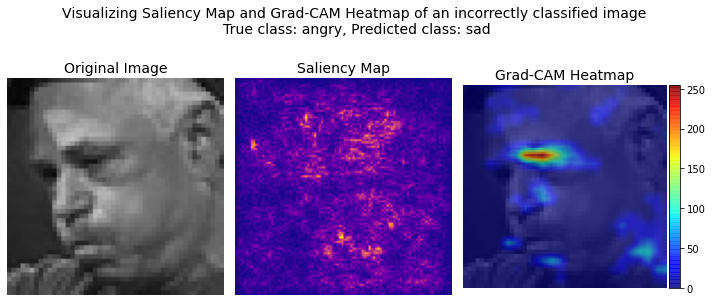

In [ ]:
#Class angry
score = CategoricalScore([pred_labels[0]])
saliency_map = saliency(score, images[0].reshape(96, 96, 3))
cam = gradcam(score, images[0].reshape(96, 96, 3), penultimate_layer=-1)
heatmap = np.uint8(cm.jet(cam[0])[..., :3] * 255)

#Plotting the saliency and Grad-CAM maps
fig, ax = plt.subplots(1,3, figsize=(10, 10))
divider = make_axes_locatable(ax[2])
cax = divider.append_axes('right', size='5%', pad=0.05)

ax[0].imshow(images[0].reshape(96, 96, 3), label = 'Original Image')
ax[0].grid(visible = None)
ax[0].axis('off')
ax[0].set_title('Original Image', fontsize = 14)

ax[1].imshow(saliency_map[0], cmap='plasma')
ax[1].grid(visible = None)
ax[1].axis('off')
ax[1].set_title('Saliency Map', fontsize = 14)

ax[2].imshow(images[0].reshape(96, 96, 3))
hm = ax[2].imshow(heatmap, cmap = 'jet', alpha = 0.6)
fig.colorbar(hm, cax = cax)
ax[2].grid(visible = None)
ax[2].axis('off')
ax[2].set_title('Grad-CAM Heatmap', fontsize = 14)

fig.suptitle(f'Visualizing Saliency Map and Grad-CAM Heatmap of an incorrectly classified image \nTrue class: {class_name[true_labels[0]]}, Predicted class: {class_name[pred_labels[0]]}', y = 0.75, fontsize = 14)
plt.tight_layout()

**Inference:** While the saliency and Grad-CAM maps aren't the easiest to interpret in this case, the reason behind the misclassification can still be understood if we take into account the ambiguity of this image. Both the classes 'Sad' and 'Angry' are an appropriate label for it.

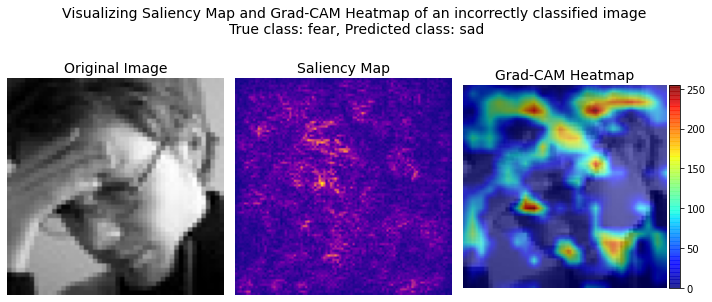

In [ ]:
#Class fear
score = CategoricalScore([pred_labels[1]])
saliency_map = saliency(score, images[1].reshape(96, 96, 3))
cam = gradcam(score, images[1].reshape(96, 96, 3), penultimate_layer=-1)
heatmap = np.uint8(cm.jet(cam[0])[..., :3] * 255)

#Plotting the saliency and Grad-CAM maps
fig, ax = plt.subplots(1,3, figsize=(10, 10))
divider = make_axes_locatable(ax[2])
cax = divider.append_axes('right', size='5%', pad=0.05)

ax[0].imshow(images[1].reshape(96, 96, 3), label = 'Original Image')
ax[0].grid(visible = None)
ax[0].axis('off')
ax[0].set_title('Original Image', fontsize = 14)

ax[1].imshow(saliency_map[0], cmap='plasma')
ax[1].grid(visible = None)
ax[1].axis('off')
ax[1].set_title('Saliency Map', fontsize = 14)

ax[2].imshow(images[1].reshape(96, 96, 3))
hm = ax[2].imshow(heatmap, cmap = 'jet', alpha = 0.6)
fig.colorbar(hm, cax = cax)
ax[2].grid(visible = None)
ax[2].axis('off')
ax[2].set_title('Grad-CAM Heatmap', fontsize = 14)

fig.suptitle(f'Visualizing Saliency Map and Grad-CAM Heatmap of an incorrectly classified image \nTrue class: {class_name[true_labels[1]]}, Predicted class: {class_name[pred_labels[1]]}', y = 0.75, fontsize = 14)
plt.tight_layout()

**Inference**: This image seems to be mislabeled. Since class 'Stress' is not an option, the class 'Sad' is the next best fit.

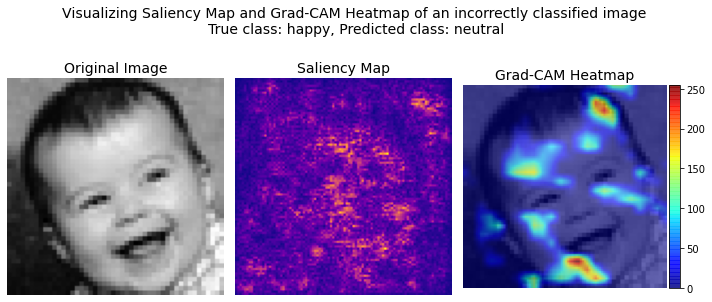

In [ ]:
#Class happy
score = CategoricalScore([pred_labels[2]])
saliency_map = saliency(score, images[2].reshape(96, 96, 3))
cam = gradcam(score, images[2].reshape(96, 96, 3), penultimate_layer=-1)
heatmap = np.uint8(cm.jet(cam[0])[..., :3] * 255)

#Plotting the saliency and Grad-CAM maps
fig, ax = plt.subplots(1,3, figsize=(10, 10))
divider = make_axes_locatable(ax[2])
cax = divider.append_axes('right', size='5%', pad=0.05)

ax[0].imshow(images[2].reshape(96, 96, 3), label = 'Original Image')
ax[0].grid(visible = None)
ax[0].axis('off')
ax[0].set_title('Original Image', fontsize = 14)

ax[1].imshow(saliency_map[0], cmap='plasma')
ax[1].grid(visible = None)
ax[1].axis('off')
ax[1].set_title('Saliency Map', fontsize = 14)

ax[2].imshow(images[2].reshape(96, 96, 3))
hm = ax[2].imshow(heatmap, cmap = 'jet', alpha = 0.6)
fig.colorbar(hm, cax = cax)
ax[2].grid(visible = None)
ax[2].axis('off')
ax[2].set_title('Grad-CAM Heatmap', fontsize = 14)

fig.suptitle(f'Visualizing Saliency Map and Grad-CAM Heatmap of an incorrectly classified image \nTrue class: {class_name[true_labels[2]]}, Predicted class: {class_name[pred_labels[2]]}', y = 0.75, fontsize = 14)
plt.tight_layout()

**Inference:** There is no notable feature the network has focused on, this is simply a bad classification.

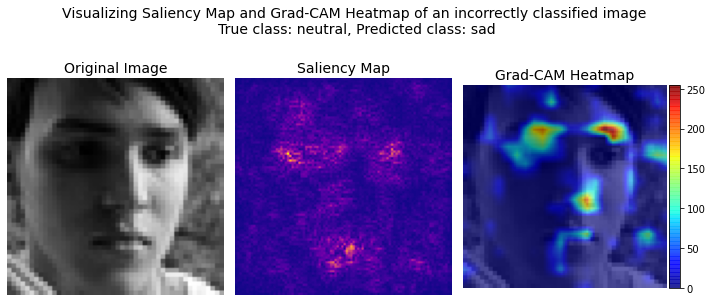

In [ ]:
#Class neutral
score = CategoricalScore([pred_labels[3]])
saliency_map = saliency(score, images[3].reshape(96, 96, 3))
cam = gradcam(score, images[3].reshape(96, 96, 3), penultimate_layer=-1)
heatmap = np.uint8(cm.jet(cam[0])[..., :3] * 255)

#Plotting the saliency and Grad-CAM maps
fig, ax = plt.subplots(1,3, figsize=(10, 10))
divider = make_axes_locatable(ax[2])
cax = divider.append_axes('right', size='5%', pad=0.05)

ax[0].imshow(images[3].reshape(96, 96, 3), label = 'Original Image')
ax[0].grid(visible = None)
ax[0].axis('off')
ax[0].set_title('Original Image', fontsize = 14)

ax[1].imshow(saliency_map[0], cmap='plasma')
ax[1].grid(visible = None)
ax[1].axis('off')
ax[1].set_title('Saliency Map', fontsize = 14)

ax[2].imshow(images[3].reshape(96, 96, 3))
hm = ax[2].imshow(heatmap, cmap = 'jet', alpha = 0.6)
fig.colorbar(hm, cax = cax)
ax[2].grid(visible = None)
ax[2].axis('off')
ax[2].set_title('Grad-CAM Heatmap', fontsize = 14)

fig.suptitle(f'Visualizing Saliency Map and Grad-CAM Heatmap of an incorrectly classified image \nTrue class: {class_name[true_labels[3]]}, Predicted class: {class_name[pred_labels[3]]}', y = 0.75, fontsize = 14)
plt.tight_layout()

**Inference:** While the true label 'Neutral' is fitting, the label 'Sad' is too. Human expressions aren't one dimensional; people are capable of expressing more than one feeling at a time, like crying from happiness. A better alternative would be to have multiple labels for images, depending on whether the probability for that particular class crosses a specific threshold.

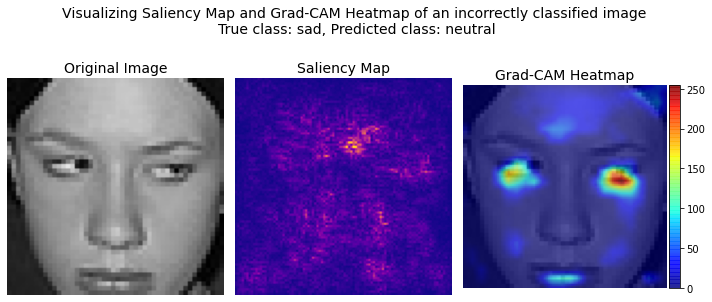

In [ ]:
#Class sad
score = CategoricalScore([pred_labels[4]])
saliency_map = saliency(score, images[4].reshape(96, 96, 3))
cam = gradcam(score, images[4].reshape(96, 96, 3), penultimate_layer=-1)
heatmap = np.uint8(cm.jet(cam[0])[..., :3] * 255)

#Plotting the saliency and Grad-CAM maps
fig, ax = plt.subplots(1,3, figsize=(10, 10))
divider = make_axes_locatable(ax[2])
cax = divider.append_axes('right', size='5%', pad=0.05)

ax[0].imshow(images[4].reshape(96, 96, 3), label = 'Original Image')
ax[0].grid(visible = None)
ax[0].axis('off')
ax[0].set_title('Original Image', fontsize = 14)

ax[1].imshow(saliency_map[0], cmap='plasma')
ax[1].grid(visible = None)
ax[1].axis('off')
ax[1].set_title('Saliency Map', fontsize = 14)

ax[2].imshow(images[4].reshape(96, 96, 3))
hm = ax[2].imshow(heatmap, cmap = 'jet', alpha = 0.6)
fig.colorbar(hm, cax = cax)
ax[2].grid(visible = None)
ax[2].axis('off')
ax[2].set_title('Grad-CAM Heatmap', fontsize = 14)

fig.suptitle(f'Visualizing Saliency Map and Grad-CAM Heatmap of an incorrectly classified image \nTrue class: {class_name[true_labels[4]]}, Predicted class: {class_name[pred_labels[4]]}', y = 0.75, fontsize = 14)
plt.tight_layout()

**Inference:** Since most of the images in the training set with class 'Sad' consist of images where people are looking down dejectedly, their eyes seemingly half closed, it makes sense why the network focused on the eyes and classified the image as 'Sad'.

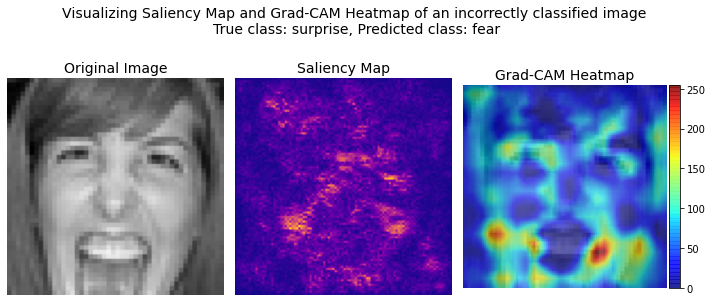

In [ ]:
#Class surprise
score = CategoricalScore([pred_labels[5]])
saliency_map = saliency(score, images[5].reshape(96, 96, 3))
cam = gradcam(score, images[5].reshape(96, 96, 3), penultimate_layer=-1)
heatmap = np.uint8(cm.jet(cam[0])[..., :3] * 255)

#Plotting the saliency and Grad-CAM maps
fig, ax = plt.subplots(1,3, figsize=(10, 10))
divider = make_axes_locatable(ax[2])
cax = divider.append_axes('right', size='5%', pad=0.05)

ax[0].imshow(images[5].reshape(96, 96, 3), label = 'Original Image')
ax[0].grid(visible = None)
ax[0].axis('off')
ax[0].set_title('Original Image', fontsize = 14)

ax[1].imshow(saliency_map[0], cmap='plasma')
ax[1].grid(visible = None)
ax[1].axis('off')
ax[1].set_title('Saliency Map', fontsize = 14)

ax[2].imshow(images[5].reshape(96, 96, 3))
hm = ax[2].imshow(heatmap, cmap = 'jet', alpha = 0.6)
fig.colorbar(hm, cax = cax)
ax[2].grid(visible = None)
ax[2].axis('off')
ax[2].set_title('Grad-CAM Heatmap', fontsize = 14)

fig.suptitle(f'Visualizing Saliency Map and Grad-CAM Heatmap of an incorrectly classified image \nTrue class: {class_name[true_labels[5]]}, Predicted class: {class_name[pred_labels[5]]}', y = 0.75, fontsize = 14)
plt.tight_layout()

**Inference:** Clearly, the network has some trouble distinguishing between the classes surprise and fear when the person in the image has their mouth open wide. This type of a face is a feature to both classes. Additionally, the bottom part of the image is cut off, which might make it even more difficult to interpret the image as 'Surprise'.

# TED Talks Data Collection Mechanism

## Web Scraping

We collect the Top 30 TED Talks in the categories **Science**, **Technology**, **Entertainment** and **Global Issues**, as ranked by number of views.

In [ ]:
#Categories to request
category_request_list = ['Science', 'Technology', 'Global+issues', 'Entertainment']
category_name_list = ['science', 'tech', 'global_issues', 'entertainment']

In [ ]:
def get_data(category_request):
    # returns dataframe of top talks and views from TED website for given category
    
    # defining links to send requests to
    parent_link = 'https://www.ted.com/'
    request_link = f'talks?sort=popular&topics%5B%5D={category_request}'
    
    # sending request
    page = requests.get(parent_link + request_link)
    
    # parsing HTML
    soup = BeautifulSoup(page.content, 'html.parser')
    s = soup.find_all('div', class_ = 'media__message')
    
    # making list of talks with information
    top_list = list()
    for lines in s:
        top_list.append(' '.join(lines.text.split()))
    
    # making dataframe of talks information
    df = pd.DataFrame({'talk_name': top_list})
    df['talk_name'] = df['talk_name'].astype("string")
    
    # extracting views and talk name from information using regex
    df['views'] = df['talk_name'].str.extract(pat = '(Views.+)', expand = False)
    df.views = df.views.str.extract(pat = '( .+)[M-]').astype(float)
    df.talk_name = df.talk_name.str.extract(pat = '(.+Views)')[0].str[:-6]
    
    # returning final dataframe
    return df

In [ ]:
#Get the data in a csv file
for category_name, category_request in zip(category_name_list, category_request_list):
    # globals()[category_name] = get_data(category_request)
    get_data(category_request).to_csv(f'{category_name}.csv')

In [ ]:
#Displaying the dataframe for category science
display(science)

talk_name  views
0   Amy Cuddy Your body language may shape who you...   65.0
1   Mary Roach 10 things you didn't know about orgasm   38.0
2                     Pamela Meyer How to spot a liar   32.0
3    Elon Musk The future we're building — and boring   30.0
4                   Dan Pink The puzzle of motivation   28.0
5              Jill Bolte Taylor My stroke of insight   28.0
6   Chris Anderson (TED) Questions no one knows th...   27.0
7         Shawn Achor The happy secret to better work   24.0
8                Helen M. Farrell What is depression?   23.0
9   Michael Mauser What are those floaty things in...   21.0
10    Dan Gilbert The surprising science of happiness   20.0
11            Jeffrey Siegel What makes muscles grow?   18.0
12  Mia Nacamulli What would happen if you didn't ...   18.0
13  Lera Boroditsky How language shapes the way we...   18.0
14    Judson Brewer A simple way to break a bad habit   17.0
15               Matt Walker Sleep is your superpower   16.0
16  Mia Nacamulli How the food you eat affects you...   16.0
17               David Gallo Underwater astonishments   16.0
18  Krishna Sudhir How do cigarettes affect the body?   16.0
19                  TED-Ed Why do women have periods?   16.0
20  Wendy Suzuki The brain-changing benefits of ex...   14.0
21             Steven Zheng How does anesthesia work?   14.0
22  Claudia Aguirre What would happen if you didn'...   13.0
23           Stephen Hawking Questioning the universe   13.0
24  Anil Seth Your brain hallucinates your conscio...   13.0
25  Greg Gage How to control someone else's arm wi...   12.0
26  Sandrine Thuret You can grow new brain cells. ...   12.0
27         Rose Eveleth The loathsome lethal mosquito   12.0
28             Helen Fisher Why we love, why we cheat   12.0
29          Tony Buffington Why do cats act so weird?   12.0
30  Thomas L. Dawson What causes dandruff, and how...   10.0
31  Daniel M. Abrams Why are some people left-handed?    9.6
32  David Epstein Are athletes really getting fast...    9.3
33     Elon Musk A future worth getting excited about    9.3
34  Karen J. Meech The story of 'Oumuamua, the fir...    9.2
35  Genevieve von Petzinger Why are these 32 symbo...    8.7

In [ ]:
#Displaying the dataframe for category technology
display(tech)

talk_name  views
0    Elon Musk The future we're building — and boring   30.0
1                  Monica Lewinsky The price of shame   20.0
2   Pranav Mistry The thrilling potential of Sixth...   19.0
3   Hugh Herr The new bionics that let us run, cli...   16.0
4                David Gallo Underwater astonishments   16.0
5   Netta Schramm Why don't perpetual motion machi...   15.0
6   Raffaello D'Andrea The astounding athletic pow...   14.0
7           Thomas Suarez A 12-year-old app developer   13.0
8   Greg Gage How to control someone else's arm wi...   12.0
9   Shah Rukh Khan Thoughts on humanity, fame and ...   11.0
10  Pattie Maes + Pranav Mistry Meet the SixthSens...   11.0
11  Sheryl Sandberg Why we have too few women leaders   11.0
12       Murat Dalkilinç The benefits of good posture   10.0
13  Raffaello D'Andrea Meet the dazzling flying ma...   10.0
14              Steve Jobs How to live before you die    9.9
15  Bill Gross The single biggest reason why start...    9.9
16  Daniel M. Abrams Why are some people left-handed?    9.6
17       Cal Newport Why you should quit social media    9.4
18     Elon Musk A future worth getting excited about    9.3
19      Markus Fischer A robot that flies like a bird    8.8
20                     Yves Rossy Fly with the Jetman    8.7
21                     Bill Gates Innovating to zero!    8.3
22                Amy Webb How I hacked online dating    8.3
23  Elon Musk The mind behind Tesla, SpaceX, Solar...    8.0
24   Paul Stamets 6 ways mushrooms can save the world    8.0
25  Tabetha Boyajian The most mysterious star in t...    7.8
26  Jane McGonigal The game that can give you 10 e...    7.6
27           J. V. Maranto History's deadliest colors    7.5
28  James Bridle The nightmare videos of children'...    7.3
29  Maurice Conti The incredible inventions of int...    7.2
30                Sherry Turkle Connected, but alone?    7.2
31                     Helen Fisher The brain in love    7.1
32  Stephen Petranek Your kids might live on Mars....    7.0
33          Johnny Lee Free or cheap Wii Remote hacks    7.0
34               Linus Torvalds The mind behind Linux    6.9
35  Don Tapscott How the blockchain is changing mo...    6.9

In [ ]:
#Displaying the dataframe for category global issues
display(global_issues)

talk_name  views
0       Bill Gates The next outbreak? We're not ready   44.0
1              Jill Bolte Taylor My stroke of insight   28.0
2             Hyeonseo Lee My escape from North Korea   23.0
3        Hans Rosling The best stats you've ever seen   15.0
4    BJ Miller What really matters at the end of life   15.0
5           Jamie Oliver Teach every child about food   10.0
6             Matthieu Ricard The habits of happiness   10.0
7   Bill Gates How we must respond to the coronavi...    8.6
8                      Bill Gates Innovating to zero!    8.3
9   Bryan Stevenson We need to talk about an injus...    8.0
10   Paul Stamets 6 ways mushrooms can save the world    8.0
11  Dan Ariely Are we in control of our own decisi...    7.8
12             Philip Zimbardo The psychology of evil    7.8
13  Simon Anholt Which country does the most good ...    7.4
14  Leslie Morgan Steiner Why domestic violence vi...    7.2
15      Sam Harris Science can answer moral questions    7.0
16  Stephen Petranek Your kids might live on Mars....    7.0
17  Mihaly Csikszentmihalyi Flow, the secret to ha...    6.9
18  Yuval Noah Harari The war in Ukraine could cha...    6.4
19      Jane McGonigal Gaming can make a better world    6.2
20  Hans and Ola Rosling How not to be ignorant ab...    6.2
21  Elif Shafak The revolutionary power of diverse...    6.1
22     Sal Khan Let's use video to reinvent education    6.0
23         Eli Pariser Beware online "filter bubbles"    6.0
24           May El-Khalil Making peace is a marathon    5.3
25  Dan Pallotta The way we think about charity is...    5.3
26  Tshering Tobgay This country isn't just carbon...    5.2
27                    Isabel Allende Tales of passion    5.2
28  Emma Bryce What really happens to the plastic ...    5.1
29               Jay Walker The world's English mania    5.0
30  Michael Pritchard How to make filthy water dri...    5.0
31     Sunitha Krishnan The fight against sex slavery    4.9
32         Wade Davis Dreams from endangered cultures    4.6
33  Hans Rosling Global population growth, box by box    4.6
34     Martin Jacques Understanding the rise of China    4.6
35             Bill Gates Teachers need real feedback    4.5

In [ ]:
#Displaying the dataframe for category entertainment
display(entertainment)

talk_name  views
0   Tim Urban Inside the mind of a master procrast...   62.0
1                  Tom Thum The orchestra in my mouth   35.0
2              Apollo Robbins The art of misdirection   31.0
3      Elizabeth Gilbert Your elusive creative genius   20.0
4   Maz Jobrani A Saudi, an Indian and an Iranian ...   19.0
5                             Keith Barry Brain magic   18.0
6               Richard St. John 8 secrets of success   16.0
7   Benjamin Zander The transformative power of cl...   15.0
8                   BLACK My journey to yo-yo mastery   15.0
9           Sarah Kay If I should have a daughter ...   15.0
10          Thomas Suarez A 12-year-old app developer   13.0
11                 Reggie Watts Beats that defy boxes   12.0
12  Anita Collins How playing an instrument benefi...   12.0
13                    Amanda Palmer The art of asking   12.0
14        Adam Driver My journey from Marine to actor   12.0
15  Maysoon Zayid I got 99 problems ... palsy is j...   11.0
16  Shah Rukh Khan Thoughts on humanity, fame and ...   11.0
17      Arthur Benjamin A performance of "Mathemagic"    9.9
18                 Mike Rowe Learning from dirty jobs    9.8
19               Derek Sivers How to start a movement    9.8
20  Sleepy Man Banjo Boys Bluegrass virtuosity fro...    9.0
21  Malcolm Gladwell The unheard story of David an...    8.4
22     Arthur Benjamin The magic of Fibonacci numbers    8.3
23    Michael Shermer Why people believe weird things    8.0
24                  Terry Moore How to tie your shoes    7.9
25  Jane McGonigal The game that can give you 10 e...    7.6
26                           Ze Frank Nerdcore comedy    7.3
27              Tom Wujec Build a tower, build a team    7.2
28  Maz Jobrani Did you hear the one about the Ira...    7.1
29          Johnny Lee Free or cheap Wii Remote hacks    7.0
30                 Evelyn Glennie How to truly listen    6.5
31  Marco Tempest The magic of truth and lies (and...    6.2
32  Manoush Zomorodi How boredom can lead to your ...    6.2
33      Jane McGonigal Gaming can make a better world    6.2
34               Lisa Bu How books can open your mind    6.2
35     Lennart Green Close-up card magic with a twist    6.0

## Making YouTube playlists of the Top 20 TED Talks from Categories: STEM, Global Issues, and Entertainment

Moving forward, we'll read the CSV files obtained previously and merge the categories **Science** and **Technology** into one category: **STEM**.

In [ ]:
#Loading the files we created into pandas dataframes
science_df = pd.read_csv('/content/drive/MyDrive/TED talks csvs/science.csv')
tech_df = pd.read_csv('/content/drive/MyDrive/TED talks csvs/tech.csv')
global_issues_df = pd.read_csv('/content/drive/MyDrive/TED talks csvs/global_issues.csv')
entertainment_df = pd.read_csv('/content/drive/MyDrive/TED talks csvs/entertainment.csv')

In [ ]:
#Merging science and tech dataframes into one, STEM
stem_df = pd.concat([science_df, tech_df], axis = 0).drop('Unnamed: 0', axis = 1)

#Sorting by views
stem_df = stem_df.sort_values('views', ascending = False).reset_index(drop = True)
stem_df.head(10)

talk_name  views
0  Amy Cuddy Your body language may shape who you...   65.0
1  Mary Roach 10 things you didn't know about orgasm   38.0
2                    Pamela Meyer How to spot a liar   32.0
3   Elon Musk The future we're building — and boring   30.0
4   Elon Musk The future we're building — and boring   30.0
5                  Dan Pink The puzzle of motivation   28.0
6             Jill Bolte Taylor My stroke of insight   28.0
7  Chris Anderson (TED) Questions no one knows th...   27.0
8        Shawn Achor The happy secret to better work   24.0
9               Helen M. Farrell What is depression?   23.0

In [ ]:
#Dropping the repeated entry
stem_df = stem_df.drop(4)

#Getting the top 20
stem_df = stem_df[:21].reset_index(drop = True)
stem_df.head(20)

talk_name  views
0   Amy Cuddy Your body language may shape who you...   65.0
1   Mary Roach 10 things you didn't know about orgasm   38.0
2                     Pamela Meyer How to spot a liar   32.0
3    Elon Musk The future we're building — and boring   30.0
4                   Dan Pink The puzzle of motivation   28.0
5              Jill Bolte Taylor My stroke of insight   28.0
6   Chris Anderson (TED) Questions no one knows th...   27.0
7         Shawn Achor The happy secret to better work   24.0
8                Helen M. Farrell What is depression?   23.0
9   Michael Mauser What are those floaty things in...   21.0
10    Dan Gilbert The surprising science of happiness   20.0
11                 Monica Lewinsky The price of shame   20.0
12  Pranav Mistry The thrilling potential of Sixth...   19.0
13  Lera Boroditsky How language shapes the way we...   18.0
14            Jeffrey Siegel What makes muscles grow?   18.0
15  Mia Nacamulli What would happen if you didn't ...   18.0
16    Judson Brewer A simple way to break a bad habit   17.0
17  Mia Nacamulli How the food you eat affects you...   16.0
18               David Gallo Underwater astonishments   16.0
19  Krishna Sudhir How do cigarettes affect the body?   16.0

In [ ]:
#Getting the top 20 for global issues
global_issues_df = global_issues_df[:20].drop('Unnamed: 0', axis = 1)
global_issues_df.head(20)

talk_name  views
0       Bill Gates The next outbreak? We're not ready   44.0
1              Jill Bolte Taylor My stroke of insight   28.0
2             Hyeonseo Lee My escape from North Korea   23.0
3        Hans Rosling The best stats you've ever seen   15.0
4    BJ Miller What really matters at the end of life   15.0
5           Jamie Oliver Teach every child about food   10.0
6             Matthieu Ricard The habits of happiness   10.0
7   Bill Gates How we must respond to the coronavi...    8.6
8                      Bill Gates Innovating to zero!    8.3
9   Bryan Stevenson We need to talk about an injus...    8.0
10   Paul Stamets 6 ways mushrooms can save the world    8.0
11  Dan Ariely Are we in control of our own decisi...    7.8
12             Philip Zimbardo The psychology of evil    7.8
13  Simon Anholt Which country does the most good ...    7.4
14  Leslie Morgan Steiner Why domestic violence vi...    7.2
15      Sam Harris Science can answer moral questions    7.0
16  Stephen Petranek Your kids might live on Mars....    7.0
17  Mihaly Csikszentmihalyi Flow, the secret to ha...    6.9
18  Yuval Noah Harari The war in Ukraine could cha...    6.4
19      Jane McGonigal Gaming can make a better world    6.2

In [ ]:
#Getting the top 20 for entertainment
entertainment_df = entertainment_df[:20].drop('Unnamed: 0', axis = 1)
entertainment_df.head(20)

talk_name  views
0   Tim Urban Inside the mind of a master procrast...   62.0
1                  Tom Thum The orchestra in my mouth   35.0
2              Apollo Robbins The art of misdirection   31.0
3      Elizabeth Gilbert Your elusive creative genius   20.0
4   Maz Jobrani A Saudi, an Indian and an Iranian ...   19.0
5                             Keith Barry Brain magic   18.0
6               Richard St. John 8 secrets of success   16.0
7   Benjamin Zander The transformative power of cl...   15.0
8                   BLACK My journey to yo-yo mastery   15.0
9           Sarah Kay If I should have a daughter ...   15.0
10          Thomas Suarez A 12-year-old app developer   13.0
11                 Reggie Watts Beats that defy boxes   12.0
12  Anita Collins How playing an instrument benefi...   12.0
13                    Amanda Palmer The art of asking   12.0
14        Adam Driver My journey from Marine to actor   12.0
15  Maysoon Zayid I got 99 problems ... palsy is j...   11.0
16  Shah Rukh Khan Thoughts on humanity, fame and ...   11.0
17      Arthur Benjamin A performance of "Mathemagic"    9.9
18                 Mike Rowe Learning from dirty jobs    9.8
19               Derek Sivers How to start a movement    9.8

Now that we have the video title of the Top 20 TED Talks for categories STEM, Global Issues and Entertainment, we'll make a query structure to generate playlists.

In [ ]:
#Creating a query structure
query_structure = 'https://www.youtube.com/results?search_query='

def ted_querify(input_string):
    # function that takes in string and returns TED talk youtube query for the string
    word_list = input_string.split()
    word_list.append('TED')
    word_list.append('Talk')
    return query_structure + '+'.join(word_list)

In [ ]:
# Testing the function
ted_querify('Bill Gates')

'https://www.youtube.com/results?search_query=Bill+Gates+TED+Talk'

In [ ]:
#Querying for STEM
stem_df['queries'] = [ted_querify(i) for i in stem_df.talk_name]
stem_df.head()

talk_name  views  \
0  Amy Cuddy Your body language may shape who you...   65.0   
1  Mary Roach 10 things you didn't know about orgasm   38.0   
2                    Pamela Meyer How to spot a liar   32.0   
3   Elon Musk The future we're building — and boring   30.0   
4                  Dan Pink The puzzle of motivation   28.0   

                                             queries  
0  https://www.youtube.com/results?search_query=A...  
1  https://www.youtube.com/results?search_query=M...  
2  https://www.youtube.com/results?search_query=P...  
3  https://www.youtube.com/results?search_query=E...  
4  https://www.youtube.com/results?search_query=D...

In [ ]:
#Querying for global issues
global_issues_df['queries'] = [ted_querify(i) for i in global_issues_df.talk_name]
global_issues_df.head()

talk_name  views  \
0     Bill Gates The next outbreak? We're not ready   44.0   
1            Jill Bolte Taylor My stroke of insight   28.0   
2           Hyeonseo Lee My escape from North Korea   23.0   
3      Hans Rosling The best stats you've ever seen   15.0   
4  BJ Miller What really matters at the end of life   15.0   

                                             queries  
0  https://www.youtube.com/results?search_query=B...  
1  https://www.youtube.com/results?search_query=J...  
2  https://www.youtube.com/results?search_query=H...  
3  https://www.youtube.com/results?search_query=H...  
4  https://www.youtube.com/results?search_query=B...

In [ ]:
#Querying for entertainment
entertainment_df['queries'] = [ted_querify(i) for i in entertainment_df.talk_name]
entertainment_df.head()

talk_name  views  \
0  Tim Urban Inside the mind of a master procrast...   62.0   
1                 Tom Thum The orchestra in my mouth   35.0   
2             Apollo Robbins The art of misdirection   31.0   
3     Elizabeth Gilbert Your elusive creative genius   20.0   
4  Maz Jobrani A Saudi, an Indian and an Iranian ...   19.0   

                                             queries  
0  https://www.youtube.com/results?search_query=T...  
1  https://www.youtube.com/results?search_query=T...  
2  https://www.youtube.com/results?search_query=A...  
3  https://www.youtube.com/results?search_query=E...  
4  https://www.youtube.com/results?search_query=M...

In [ ]:
# STEM query playlist

for query in stem_df.queries:
    webbrowser.open(query)

In [ ]:
# Global issues query playlist

for query in global_issues_df.queries:
    webbrowser.open(query)

In [ ]:
# entertainment query playlist

for query in entertainment_df.queries:
    webbrowser.open(query)

## Downloading Playlists using YouTube-dl

Youtube dl is a command line tool wherein you have to pass the playlist link as argument and the format to download the videos, we downloaded the following Three playlists:

https://youtube.com/playlist?list=PLGJyEKTExDKEA6UlWKzc8BDpPuu3lI2hW

https://youtube.com/playlist?list=PLGJyEKTExDKEN5KXB_Ep2oiHBBaiZ_22S

https://youtube.com/playlist?list=PLGJyEKTExDKGaSarKAifNrQHKT7z_HZAP

In [ ]:
# This command downloads the entertainment playlist
!youtube-dl -i -f mp4 --yes-playlist 'https://youtube.com/playlist?list=PLGJyEKTExDKEA6UlWKzc8BDpPuu3lI2hW'

Similarly, we downloaded the other two playlists as well

## OpenCV

In [ ]:
# checking video files in directory
video_path = '/Users/adityadoomra/Desktop/Aditya/college_projects/Univ/AI2/Project/videos/'
target_path = 'stem/'

files_list = os.listdir(video_path + target_path)
files_list

[' How To Spot A Liar | Pamela Meyer.mp4',
 '.DS_Store',
 'The Surprising Science Of Happiness | Dan Gilbert .mp4',
 'What is depression? - Helen M. Farrell.mp4',
 'Your body language may shape who you are | Amy Cuddy.mp4',
 'The Thrilling Potential Of SixthSense Technology | Pranav Mistry.mp4',
 "Mary Roach 10 Things you didn't know about an orgasm.mp4",
 'The Puzzle Of Motivation | Dan Pink .mp4',
 'How do cigarettes affect the body? - Krishna Sudhir.mp4',
 'Underwater Astonishments | David Gallo.mp4',
 'What are those floaty things in your eye? - Michael Mauser.mp4',
 'Questions No One Knows the Answers to (Full Version).mp4',
 'My Stroke Of Insight | Jill Bolte Taylor.mp4',
 'What would happen if you didnâ\x80\x99t drink water? - Mia Nacamulli.mp4',
 "Elon Musk_ The future we're building -- and boring | TED.mp4",
 '.ipynb_checkpoints',
 'A simple way to break a bad habit | Judson Brewer.mp4',
 'The Happy Secret To Better Work | Shawn Achor.mp4',
 'How language shapes the way we thi

In [ ]:
len(os.listdir('/Users/adityadoomra/Desktop/Aditya/college_projects/Univ/AI2/Project/data/stem/'))

649

In [ ]:
# defining function to capture faces from 100 stills in video and save them
# some lines of code taken from https://stackoverflow.com/questions/57791203/python-take-screenshot-from-video
def get_faces(filepath, filename, category, outputFolder, step ,frames_count = 100):
    
    # defining helper variables
    currentframe = 0
    frames_captured = 0

    #reading the video from specified path 
    cam = cv2.VideoCapture(filepath + filename) 
    last_frame = int(cam.get(cv2.CAP_PROP_FRAME_COUNT))
    first_frame = 0
    step_size = int((last_frame - first_frame) / frames_count)
    
    #reading the number of frames at that particular second
    frame_per_second = cam.get(cv2.CAP_PROP_FPS)

    while (True):
        ret, frame = cam.read()
        if ret:
            if currentframe > (step_size):  
                currentframe = 0
                # Convert into grayscale
                gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

                # Loading cascade
                face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+ 'haarcascade_frontalface_alt2.xml')

                # Detect faces
                faces = face_cascade.detectMultiScale(gray, 1.1, 4)
                
                # initialising face counter variable
                face_counter = 0

                for (x, y, w, h) in faces:
                    # Cropping the image
                    cropped_image = frame[y : y + h, x : x + w]

                    face_counter += 1
                    
                    # saving cropped face
                    name = f'./data/{category}/{filename}_frame_' + str(frames_captured) + f'_face_{face_counter}.jpg'
                    print('Creating...' + name) 
                    cv2.imwrite(name, cropped_image)
                 
                frames_captured+=1

            #breaking the loop when count achieved
            if frames_captured > frames_count-1:
                ret = False
            currentframe += 1           
        if ret == False:
            break

    #Releasing all space and windows once done
    cam.release()
    cv2.destroyAllWindows()

Converting all STEM videos to stills of faces

In [ ]:
# looping through all videos in stem folder with get_faces function
for file_name in files_list:
    get_faces(video_path + target_path ,file_name, 'stem','./data/', 10)

Converting all Entertainment videos to stills of faces

In [ ]:
target_path = 'entertainment/'
files_list = os.listdir(video_path + target_path)

In [ ]:
files_list

['Your Elusive Creative Genius | Elizabeth Gilbert.mp4',
 'Tim Urban_ Inside the mind of a master procrastinator | TED.mp4',
 'A Saudi, an Indian and an Iranian walk into a Qatari bar ... | Maz Jobrani.mp4',
 'My journey from Marine to actor | Adam Driver.mp4',
 'Reggie Watts disorients you in the most entertaining way.mp4',
 'Tom Thum_ The orchestra in my mouth | TED.mp4',
 'If I Should Have A Daughter ... | Sarah Kay.mp4',
 'Thoughts on humanity, fame and love | Shah Rukh Khan.mp4',
 'How To Start A Movement | Derek Sivers.mp4',
 'The Transformative Power Of Classical Music | Benjamin Zander.mp4',
 'Secrets Of Success In 8 Words, 3 Minutes | Richard St. John.mp4',
 'The art of misdirection | Apollo Robbins.mp4',
 'My journey to yo-yo mastery | BLACK.mp4',
 'Learning From Dirty Jobs | Mike Rowe.mp4',
 'How playing an instrument benefits your brain - Anita Collins.mp4',
 'I got 99 problems... palsy is just one | Maysoon Zayid.mp4',
 'Brain Magic | Keith Barry.mp4',
 'The art of asking 

In [ ]:
# looping through all videos in entertainment folder with get_faces function
for file_name in files_list:
    get_faces(video_path + target_path ,file_name, 'entertainment','./data/', 10)

Converting all Global issues videos to stills of faces

In [ ]:
target_path = 'global_issues/'
files_list = os.listdir(video_path + target_path)

In [ ]:
files_list

['The Habits Of Happiness | Matthieu Ricard.mp4',
 'Teach Every Child About Food | Jamie Oliver.mp4',
 "Why domestic violence victims don't leave | Leslie Morgan Steiner.mp4",
 "The Best Stats You've Ever Seen | Hans Rosling.mp4",
 '.DS_Store',
 'Science Can Answer Moral Questions | Sam Harris.mp4',
 'Which country does the most good for the world? | Simon Anholt.mp4',
 'Gaming Can Make A Better World | Jane McGonigal.mp4',
 "Your kids might live on Mars. Here's how they'll survive | Stephen Petranek.mp4",
 '6 Ways Mushrooms Can Save The World | Paul Stamets.mp4',
 'What really matters at the end of life | BJ Miller.mp4',
 'Are We In Control Of Our Decisions? | Dan Ariely',
 'The Psychology Of Evil | Philip Zimbardo.mp4',
 'My Stroke Of Insight | Jill Bolte Taylor.mp4',
 'Mihaly Csikszentmihalyi- Flow, The Secret To Happiness.mp4',
 'The War in Ukraine Could Change Everything | Yuval Noah Harari | TED.mp4',
 'Hyeonseo Lee_ My escape from North Korea | TED.mp4',
 'Bill Gates_ The next o

In [ ]:
# looping through all videos in global_issues folder with the get_faces function
for file_name in files_list:
    get_faces(video_path + target_path ,file_name, 'global_issues','./data/', 10)

Creating..../data/global_issues/The Habits Of Happiness | Matthieu Ricard.mp4_frame_2_face_1.jpg
Creating..../data/global_issues/The Habits Of Happiness | Matthieu Ricard.mp4_frame_7_face_1.jpg
Creating..../data/global_issues/The Habits Of Happiness | Matthieu Ricard.mp4_frame_8_face_1.jpg
Creating..../data/global_issues/The Habits Of Happiness | Matthieu Ricard.mp4_frame_9_face_1.jpg
Creating..../data/global_issues/The Habits Of Happiness | Matthieu Ricard.mp4_frame_11_face_1.jpg
Creating..../data/global_issues/The Habits Of Happiness | Matthieu Ricard.mp4_frame_12_face_1.jpg
Creating..../data/global_issues/The Habits Of Happiness | Matthieu Ricard.mp4_frame_13_face_1.jpg
Creating..../data/global_issues/The Habits Of Happiness | Matthieu Ricard.mp4_frame_14_face_1.jpg
Creating..../data/global_issues/The Habits Of Happiness | Matthieu Ricard.mp4_frame_15_face_1.jpg
Creating..../data/global_issues/The Habits Of Happiness | Matthieu Ricard.mp4_frame_16_face_1.jpg
Creating..../data/global

OpenCV: Couldn't read video stream from file "/Users/adityadoomra/Desktop/Aditya/college_projects/Univ/AI2/Project/videos/global_issues/.DS_Store"
[ERROR:0@1845.632] global /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/videoio/src/cap.cpp (166) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): /Users/adityadoomra/Desktop/Aditya/college_projects/Univ/AI2/Project/videos/global_issues/.DS_Store in function 'icvExtractPattern'




Creating..../data/global_issues/Science Can Answer Moral Questions | Sam Harris.mp4_frame_0_face_1.jpg
Creating..../data/global_issues/Science Can Answer Moral Questions | Sam Harris.mp4_frame_4_face_1.jpg
Creating..../data/global_issues/Science Can Answer Moral Questions | Sam Harris.mp4_frame_5_face_1.jpg
Creating..../data/global_issues/Science Can Answer Moral Questions | Sam Harris.mp4_frame_8_face_1.jpg
Creating..../data/global_issues/Science Can Answer Moral Questions | Sam Harris.mp4_frame_15_face_1.jpg
Creating..../data/global_issues/Science Can Answer Moral Questions | Sam Harris.mp4_frame_18_face_1.jpg
Creating..../data/global_issues/Science Can Answer Moral Questions | Sam Harris.mp4_frame_19_face_1.jpg
Creating..../data/global_issues/Science Can Answer Moral Questions | Sam Harris.mp4_frame_20_face_1.jpg
Creating..../data/global_issues/Science Can Answer Moral Questions | Sam Harris.mp4_frame_23_face_1.jpg
Creating..../data/global_issues/Science Can Answer Moral Questions |

# TED Talks Expression Analysis using Transfer Learning Model

## Obtaining information on all the files in the dataset

Now that we have our TED Talks Image Dataset for all three categories: STEM, Global Issues and Entertainment, we'll obtain the file names as well for all the files from each category.

In [ ]:
# Get the file names for all the images in the TED Talks Dataset
path_stem = '/content/drive/MyDrive/TED Talks Dataset/stem/stem'
image_names_stem = [f for f in os.listdir(path_stem) if os.path.splitext(f)[-1] == '.jpg']

path_gi = '/content/drive/MyDrive/TED Talks Dataset/global_issues/global_issues'
image_names_gi = [f for f in os.listdir(path_gi) if os.path.splitext(f)[-1] == '.jpg']

path_ent = '/content/drive/MyDrive/TED Talks Dataset/entertainment/entertainment'
image_names_ent = [f for f in os.listdir(path_ent) if os.path.splitext(f)[-1] == '.jpg']

Next, we will extract the name of the talk, frame number and face number from the file names to create a pandas dataframe for easy reference.

In [ ]:
#Extracting info for STEM set
category, talkname, frame, face = [], [], [], []
for i in image_names_stem:
  string_split = re.split(r'.mp4_frame_|_face_|.jpg', i, maxsplit = 4)
  category.append('STEM')
  talkname.append(string_split[0])
  frame.append(string_split[1])
  face.append(string_split[2])

#Making a dataframe
STEM_DF = pd.DataFrame(list(zip(category, talkname, frame, face)), columns = ['Category', 'TED Talk Name', 'Frame No.', 'Face No.'])
STEM_DF.head()

Category                         TED Talk Name Frame No. Face No.
0     STEM  The price of shame _ Monica Lewinsky        69        1
1     STEM  The price of shame _ Monica Lewinsky        89        2
2     STEM  The price of shame _ Monica Lewinsky        68        1
3     STEM  The price of shame _ Monica Lewinsky        78        1
4     STEM  The price of shame _ Monica Lewinsky        75        1

In [ ]:
#Checking for errors
STEM_DF['TED Talk Name'].value_counts()

Elon Musk_ The future we_re building -- and boring _ TED            83
The price of shame _ Monica Lewinsky                                78
How language shapes the way we think _ Lera Boroditsky              73
The Puzzle Of Motivation _ Dan Pink                                 65
The Happy Secret To Better Work _ Shawn Achor                       61
A simple way to break a bad habit _ Judson Brewer                   59
Mary Roach 10 Things you didn_t know about an orgasm                59
Your body language may shape who you are _ Amy Cuddy                45
How To Spot A Liar _ Pamela Meyer                                   42
My Stroke Of Insight _ Jill Bolte Taylor                            31
The Thrilling Potential Of SixthSense Technology _ Pranav Mistry    30
The Surprising Science Of Happiness _ Dan Gilbert                   22
Name: TED Talk Name, dtype: int64

In [ ]:
print(STEM_DF['Frame No.'].value_counts(), '\n\n', STEM_DF['Face No.'].value_counts())

2     11
48    10
16    10
45    10
70    10
      ..
91     3
37     3
0      2
98     2
64     2
Name: Frame No., Length: 99, dtype: int64 

 1    637
2     11
Name: Face No., dtype: int64


In [ ]:
#Extracting info for Global Issues set
category, talkname, frame, face = [], [], [], []
for i in image_names_gi:
  string_split = re.split(r'.mp4_frame_|_frame_|_face_|.jpg', i, maxsplit = 5)
  category.append('Global Issues')
  talkname.append(string_split[0])
  frame.append(string_split[1])
  face.append(string_split[2])

#Making a dataframe
GI_DF = pd.DataFrame(list(zip(category, talkname, frame, face)), columns = ['Category', 'TED Talk Name', 'Frame No.', 'Face No.'])
GI_DF.head()

Category                                      TED Talk Name Frame No.  \
0  Global Issues  How we must respond to the coronavirus pandemi...        63   
1  Global Issues  How we must respond to the coronavirus pandemi...        62   
2  Global Issues  How we must respond to the coronavirus pandemi...        55   
3  Global Issues  How we must respond to the coronavirus pandemi...        75   
4  Global Issues  How we must respond to the coronavirus pandemi...        60   

  Face No.  
0        1  
1        1  
2        3  
3        1  
4        1

In [ ]:
#Checking for errors
GI_DF['TED Talk Name'].value_counts()

The War in Ukraine Could Change Everything _ Yuval Noah Harari _ TED           123
How we must respond to the coronavirus pandemic _ Bill Gates                   113
Which country does the most good for the world_ _ Simon Anholt                  80
The Habits Of Happiness _ Matthieu Ricard                                       80
What really matters at the end of life _ BJ Miller                              76
Why domestic violence victims don_t leave _ Leslie Morgan Steiner               74
Hyeonseo Lee_ My escape from North Korea _ TED                                  69
Bryan Stevenson_ We need to talk about an injustice _ TED                       63
Your kids might live on Mars. Here_s how they_ll survive _ Stephen Petranek     58
Gaming Can Make A Better World _ Jane McGonigal                                 48
Bill Gates_ The next outbreak_ Weâre not ready _ TED                         38
Teach Every Child About Food _ Jamie Oliver                                     38
Are W

In [ ]:
print(GI_DF['Frame No.'].value_counts(), '\n\n', GI_DF['Face No.'].value_counts())

2     16
84    16
80    16
58    14
10    14
      ..
63     6
90     6
12     6
98     5
0      2
Name: Frame No., Length: 99, dtype: int64 

 1    985
2     63
3      5
Name: Face No., dtype: int64


In [ ]:
#Extracting info for Entertainment set
category, talkname, frame, face = [], [], [], []
for i in image_names_ent:
  string_split = re.split(r'.mp4_frame_|_face_|.jpg', i, maxsplit = 4)
  category.append('Entertainment')
  talkname.append(string_split[0])
  frame.append(string_split[1])
  face.append(string_split[2])

#Making a dataframe
ENT_DF = pd.DataFrame(list(zip(category, talkname, frame, face)), columns = ['Category', 'TED Talk Name', 'Frame No.', 'Face No.'])
ENT_DF.head()

Category                                TED Talk Name Frame No.  \
0  Entertainment  A 12-year-old app developer _ Thomas Suarez        87   
1  Entertainment  A 12-year-old app developer _ Thomas Suarez        84   
2  Entertainment  A 12-year-old app developer _ Thomas Suarez        39   
3  Entertainment  A 12-year-old app developer _ Thomas Suarez        68   
4  Entertainment  A 12-year-old app developer _ Thomas Suarez        73   

  Face No.  
0        1  
1        1  
2        1  
3        1  
4        1

In [ ]:
ENT_DF['TED Talk Name'].value_counts()

Your Elusive Creative Genius _ Elizabeth Gilbert                              90
Thoughts on humanity, fame and love _ Shah Rukh Khan                          84
A 12-year-old app developer _ Thomas Suarez                                   81
Learning From Dirty Jobs _ Mike Rowe                                          67
My journey from Marine to actor _ Adam Driver                                 67
The art of asking _ Amanda Palmer                                             66
I got 99 problems... palsy is just one _ Maysoon Zayid                        65
If I Should Have A Daughter ... _ Sarah Kay                                   59
The art of misdirection _ Apollo Robbins                                      56
Tim Urban_ Inside the mind of a master procrastinator _ TED                   55
Brain Magic _ Keith Barry                                                     54
A Saudi, an Indian and an Iranian walk into a Qatari bar ... _ Maz Jobrani    45
My journey to yo-yo mastery 

In [ ]:
print(ENT_DF['Frame No.'].value_counts(), '\n\n', ENT_DF['Face No.'].value_counts())

56    15
25    14
31    13
36    13
58    13
      ..
74     7
63     7
6      6
79     5
98     3
Name: Frame No., Length: 98, dtype: int64 

 1    889
2     47
3      3
8      2
5      1
4      1
9      1
Name: Face No., dtype: int64


Now we have all the information from the file names in a dataframe. Next, we'll load the images themselves and feed them to our transfer learning model to make predictions.

## Predicting on the dataset using our Transfer Learning Model

**Creating the Generators**

For our TED Talks Image Dataset, we will create three data generators, one for each category of the set.

First we create a main data generator object, datagen. This can be a given a wide range of arguments which can be used to preprocess the images it generates. For now, we will only use the rescale argument to normalize all pixel values between 0 and 1 (remember that 255 is the max pixel value).

Next, we use `datagen`'s `flow_from_directory` method to create the 3 generators: `stemgen`, `gigen`, and `entgen` corresponding to the categories '**STEM**', '**Global Issues**' and '**Entertainment**'.

In [ ]:
#Creating main data generator object
datagen  = ImageDataGenerator(rescale = 1./255)

#Creating generators for each category
stemgen = datagen.flow_from_directory(directory='/content/drive/MyDrive/TED Talks Dataset/stem', color_mode='rgb', class_mode = None,
                                          batch_size = 1, shuffle = False, target_size=(224, 224))

gigen = datagen.flow_from_directory(directory='/content/drive/MyDrive/TED Talks Dataset/global_issues', color_mode='rgb', class_mode = None,
                                          batch_size = 1, shuffle = False, target_size=(224, 224))

entgen = datagen.flow_from_directory(directory='/content/drive/MyDrive/TED Talks Dataset/entertainment', color_mode='rgb', class_mode = None,
                                          batch_size = 1, shuffle = False, target_size=(224, 224))

Found 648 images belonging to 1 classes.
Found 1053 images belonging to 1 classes.
Found 944 images belonging to 1 classes.


In [ ]:
#Load the model
model = keras.models.load_model('/content/drive/MyDrive/model/model2.h5')

In [ ]:
#Labels according to the predictions of our model
label_dict = {0: 'Angry', 1 : 'Fear', 2: 'Happy', 3: 'Neutral', 4: 'Sad', 5: 'Surprise'}

In [ ]:
# Predicting on STEM dataset
stem_pred = model.predict(stemgen_rs)
highest_prob = stem_pred.max(axis = 1)
stem_pred_class = np.argmax(stem_pred, axis = 1)

In [ ]:
# Making a dataframe to store all predictions for STEM
STEM_RESULTS = pd.DataFrame(list(zip(stem_pred[:,0], stem_pred[:,1], stem_pred[:,2], stem_pred[:,3], stem_pred[:,4], stem_pred[:,5],
                                     #stem_pred[:,4], stem_pred[:,5], stem_pred[:,6],
                                     stem_pred.max(axis = 1), stem_pred_class,
                                     [label_dict[i] for i in stem_pred_class])),
                            columns = ['Angry Probability', 'Fear Probability', 'Happy Probability', 'Neutral Probability', 'Sad Probability', 'Surprise Probability',
                                       'Highest Probability', 'Predicted Class', 'Expression'])

STEM_RESULTS.head()

Angry Probability  Fear Probability  Happy Probability  \
0           0.092349          0.100235           0.035370   
1           0.107667          0.116856           0.023245   
2           0.201986          0.238879           0.025145   
3           0.201528          0.123324           0.188945   
4           0.086390          0.070904           0.376725   

   Neutral Probability  Sad Probability  Surprise Probability  \
0             0.570812         0.186471              0.014764   
1             0.526658         0.210055              0.015519   
2             0.202730         0.275591              0.055670   
3             0.173058         0.300186              0.012959   
4             0.286303         0.166451              0.013227   

   Highest Probability  Predicted Class Expression  
0             0.570812                3    Neutral  
1             0.526658                3    Neutral  
2             0.275591                4        Sad  
3             0.300186                4        Sad  
4             0.376725                2      Happy

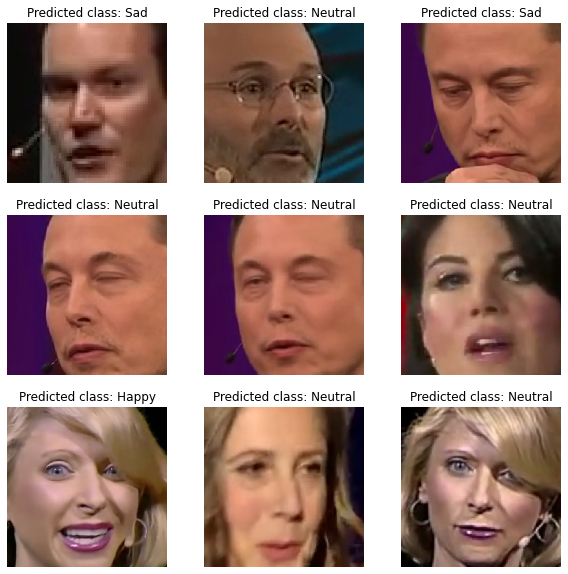

In [ ]:
# Plotting some of the images from STEM along with their predictions
stem_idx = np.random.choice(range(len(stemgen_rs)), size = 9)

fig, ax = plt.subplots(3, 3, figsize = (10, 10))
ax = ax.ravel()

for i, idx in enumerate(stem_idx):
  ax[i].imshow(stemgen[idx].reshape(250, 250, 3))
  ax[i].set_title(f'Predicted class: {label_dict[stem_pred_class[idx]]}', fontsize = 12)
  ax[i].grid(visible = None)
  ax[i].axis('off')

We'll repeat the above process for both **Global Issues** and **Entertainment** sets too.

In [ ]:
# Predicting on Global Issues dataset
gi_pred = model.predict(gigen_rs)
highest_prob = gi_pred.max(axis = 1)
gi_pred_class = np.argmax(gi_pred, axis = 1)

In [ ]:
# Making a dataframe to store all predictions for Global Issues
GI_RESULTS = pd.DataFrame(list(zip(gi_pred[:,0], gi_pred[:,1], gi_pred[:,2], gi_pred[:,3], gi_pred[:,4], gi_pred[:,5],
                                   #gi_pred[:,4], gi_pred[:,5], gi_pred[:,6],
                                   gi_pred.max(axis = 1), gi_pred_class,
                                   [label_dict[i] for i in gi_pred_class])),
                          columns = ['Angry Probability', 'Fear Probability', 'Happy Probability', 'Neutral Probability', 'Sad Probability', 'Surprise Probability',
                                       'Highest Probability', 'Predicted Class', 'Expression'])

GI_RESULTS.head()

Angry Probability  Fear Probability  Happy Probability  \
0           0.266237          0.149841           0.030441   
1           0.288282          0.198618           0.084922   
2           0.134665          0.125164           0.047519   
3           0.273964          0.154193           0.039097   
4           0.190514          0.122892           0.110723   

   Neutral Probability  Sad Probability  Surprise Probability  \
0             0.157341         0.389088              0.007053   
1             0.112418         0.286809              0.028951   
2             0.417432         0.260739              0.014482   
3             0.150705         0.373160              0.008881   
4             0.230952         0.334922              0.009996   

   Highest Probability  Predicted Class Expression  
0             0.389088                4        Sad  
1             0.288282                0      Angry  
2             0.417432                3    Neutral  
3             0.373160                4        Sad  
4             0.334922                4        Sad

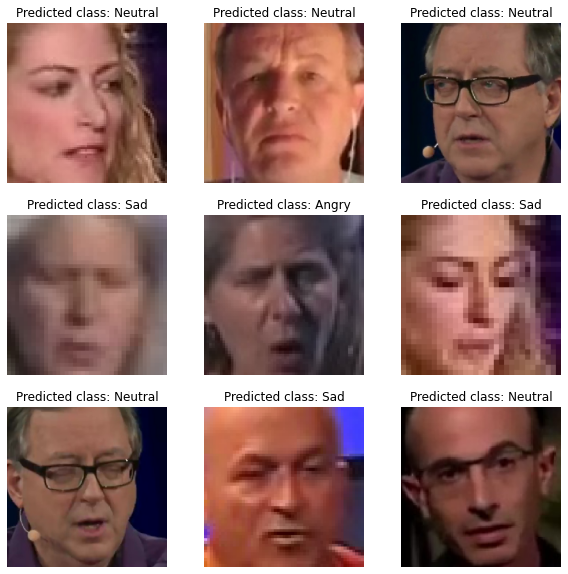

In [ ]:
# Plotting some of the images from Global Issues along with their predictions
gi_idx = np.random.choice(range(len(gigen_rs)), size = 9)

fig, ax = plt.subplots(3, 3, figsize = (10, 10))
ax = ax.ravel()

for i, idx in enumerate(gi_idx):
  ax[i].imshow(gigen[idx].reshape(250, 250, 3))
  ax[i].set_title(f'Predicted class: {label_dict[gi_pred_class[idx]]}', fontsize = 12)
  ax[i].grid(visible = None)
  ax[i].axis('off')

In [ ]:
# Predicting on Entertainment dataset
ent_pred = model.predict(entgen_rs)
highest_prob = ent_pred.max(axis = 1)
ent_pred_class = np.argmax(ent_pred, axis = 1)

In [ ]:
# Making a dataframe to store all predictions for Entertainment
ENT_RESULTS = pd.DataFrame(list(zip(ent_pred[:,0], ent_pred[:,1], ent_pred[:,2], ent_pred[:,3],
                                    ent_pred[:,4], ent_pred[:,5],
                                    ent_pred.max(axis = 1), ent_pred_class,
                                    [label_dict[i] for i in ent_pred_class])),
                           columns = ['Angry Probability', 'Fear Probability', 'Happy Probability', 'Neutral Probability', 'Sad Probability', 'Surprise Probability',
                                       'Highest Probability', 'Predicted Class', 'Expression'])

ENT_RESULTS.head()

Angry Probability  Fear Probability  Happy Probability  \
0           0.277069          0.136086           0.012560   
1           0.248777          0.156026           0.019080   
2           0.262399          0.146764           0.012786   
3           0.138436          0.077050           0.124392   
4           0.102453          0.054290           0.132436   

   Neutral Probability  Sad Probability  Surprise Probability  \
0             0.179849         0.390500              0.003936   
1             0.191383         0.376856              0.007878   
2             0.191034         0.381609              0.005408   
3             0.373012         0.283162              0.003948   
4             0.482327         0.226081              0.002412   

   Highest Probability  Predicted Class Expression  
0             0.390500                4        Sad  
1             0.376856                4        Sad  
2             0.381609                4        Sad  
3             0.373012                3    Neutral  
4             0.482327                3    Neutral

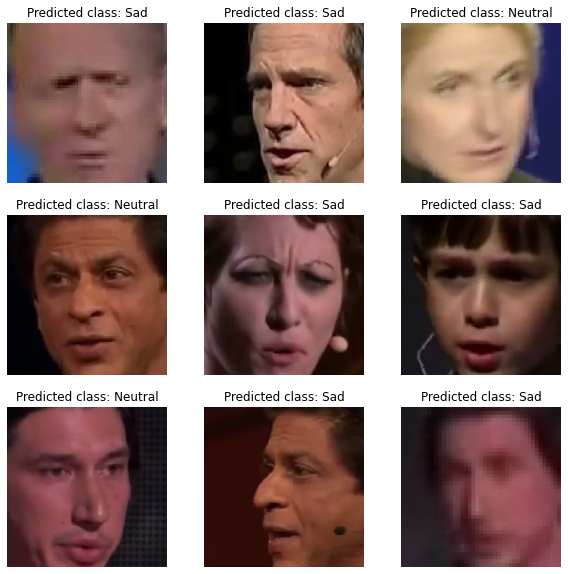

In [ ]:
# Plotting some of the images from Entertainment along with their predictions
ent_idx = np.random.choice(range(len(entgen_rs)), size = 9)

fig, ax = plt.subplots(3, 3, figsize = (10, 10))
ax = ax.ravel()

for i, idx in enumerate(ent_idx):
  ax[i].imshow(entgen[idx].reshape(250, 250, 3))
  ax[i].set_title(f'Predicted class: {label_dict[ent_pred_class[idx]]}', fontsize = 12)
  ax[i].grid(visible = None)
  ax[i].axis('off')

We'll combine everything we have done so far in a single pandas dataframe and then use it to perform analysis and gain insights.

In [ ]:
#Concating image info and prediction results for STEM, Global Issues and Entertainment
stem = pd.concat([STEM_DF, STEM_RESULTS], axis = 1)
gi = pd.concat([GI_DF, GI_RESULTS], axis = 1)
ent = pd.concat([ENT_DF, ENT_RESULTS], axis = 1)

#Combining everything in a single dataframe
tedtalks = pd.concat([stem, gi, ent], axis = 0)
tedtalks.head(10)

Category                         TED Talk Name Frame No. Face No.  \
0     STEM  The price of shame _ Monica Lewinsky        69        1   
1     STEM  The price of shame _ Monica Lewinsky        89        2   
2     STEM  The price of shame _ Monica Lewinsky        68        1   
3     STEM  The price of shame _ Monica Lewinsky        78        1   
4     STEM  The price of shame _ Monica Lewinsky        75        1   
5     STEM  The price of shame _ Monica Lewinsky        70        1   
6     STEM  The price of shame _ Monica Lewinsky        55        1   
7     STEM  The price of shame _ Monica Lewinsky        79        1   
8     STEM  The price of shame _ Monica Lewinsky        84        1   
9     STEM  The price of shame _ Monica Lewinsky        92        1   

   Angry Probability  Fear Probability  Happy Probability  \
0           0.092349          0.100235           0.035370   
1           0.107667          0.116856           0.023245   
2           0.201986          0.238879           0.025145   
3           0.201528          0.123324           0.188945   
4           0.086390          0.070904           0.376725   
5           0.121157          0.086962           0.042847   
6           0.033423          0.031226           0.080690   
7           0.157968          0.186714           0.117282   
8           0.128773          0.069019           0.493514   
9           0.078247          0.235674           0.031802   

   Neutral Probability  Sad Probability  Surprise Probability  \
0             0.570812         0.186471              0.014764   
1             0.526658         0.210055              0.015519   
2             0.202730         0.275591              0.055670   
3             0.173058         0.300186              0.012959   
4             0.286303         0.166451              0.013227   
5             0.498113         0.245667              0.005254   
6             0.769840         0.081376              0.003445   
7             0.236518         0.241089              0.060428   
8             0.124249         0.175691              0.008755   
9             0.237720         0.135746              0.280811   

   Highest Probability  Predicted Class Expression  
0             0.570812                3    Neutral  
1             0.526658                3    Neutral  
2             0.275591                4        Sad  
3             0.300186                4        Sad  
4             0.376725                2      Happy  
5             0.498113                3    Neutral  
6             0.769840                3    Neutral  
7             0.241089                4        Sad  
8             0.493514                2      Happy  
9             0.280811                5   Surprise

In [ ]:
#Saving the dataframe as a csv file to drive
tedtalks.to_csv('tedtalks.csv')
!cp tedtalks.csv '/content/drive/MyDrive/TED talks csvs'

In [ ]:
#Combining all the images in a single array
tedtalks_images = []
for i in range(len(stemgen)):
  tedtalks_images.append(stemgen[i])

for i in range(len(gigen)):
  tedtalks_images.append(gigen[i])

for i in range(len(entgen)):
  tedtalks_images.append(entgen[i])

In [ ]:
tedtalks_images = np.array(tedtalks_images)

## Analysis

Now we have all that we require to conduct analysis.
First, we'll take a look at the total count of each expression for each category.

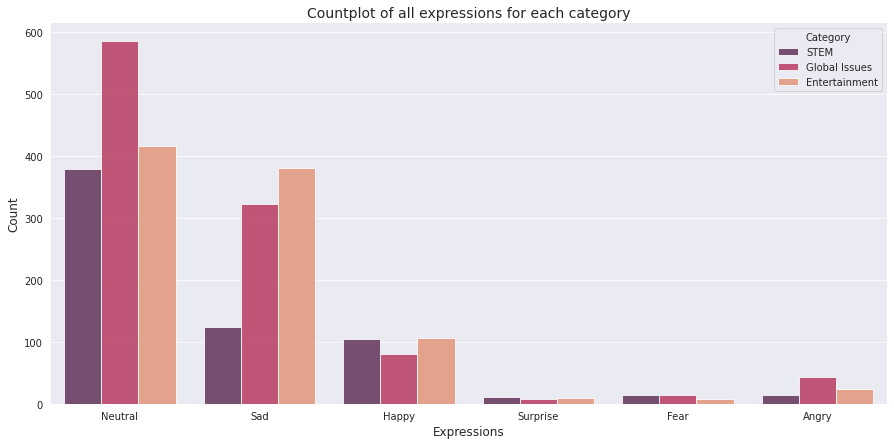

In [ ]:
#Countplot for each expression
sns.set_style('darkgrid')
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (15,7))

sns.countplot(x = 'Expression', hue = 'Category', data = tedtalks, palette = 'rocket', alpha = 0.8)
ax.set_xlabel('Expressions', fontsize = 12)
ax.set_ylabel('Count', fontsize = 12)
    
plt.title('Countplot of all expressions for each category', fontsize = 14)
sns.despine()

As observed from the above countplot, majority of the images are classified as 'Neutral', which is a realistic potrayal of expressions in the wild.

Considering the fact that there is a difference between the total number of data points belonging to each category, we'll make a plot depicting percentage wise distribution for each expression.

In [ ]:
#Calculate the proportion 
anger_prop = [len(tedtalks.loc[(tedtalks['Expression']=='Angry') & (tedtalks['Category']=='STEM')])/len(tedtalks.loc[(tedtalks['Expression']=='Angry')]) * 100,
              len(tedtalks.loc[(tedtalks['Expression']=='Angry') & (tedtalks['Category']=='Global Issues')])/len(tedtalks.loc[(tedtalks['Expression']=='Angry')]) * 100,
              len(tedtalks.loc[(tedtalks['Expression']=='Angry') & (tedtalks['Category']=='Entertainment')])/len(tedtalks.loc[(tedtalks['Expression']=='Angry')]) * 100]

fear_prop = [len(tedtalks.loc[(tedtalks['Expression']=='Fear') & (tedtalks['Category']=='STEM')])/len(tedtalks.loc[(tedtalks['Expression']=='Fear')]) * 100,
              len(tedtalks.loc[(tedtalks['Expression']=='Fear') & (tedtalks['Category']=='Global Issues')])/len(tedtalks.loc[(tedtalks['Expression']=='Fear')]) * 100,
              len(tedtalks.loc[(tedtalks['Expression']=='Fear') & (tedtalks['Category']=='Entertainment')])/len(tedtalks.loc[(tedtalks['Expression']=='Fear')]) * 100]

happy_prop = [len(tedtalks.loc[(tedtalks['Expression']=='Happy') & (tedtalks['Category']=='STEM')])/len(tedtalks.loc[(tedtalks['Expression']=='Happy')]) * 100,
              len(tedtalks.loc[(tedtalks['Expression']=='Happy') & (tedtalks['Category']=='Global Issues')])/len(tedtalks.loc[(tedtalks['Expression']=='Happy')]) * 100,
              len(tedtalks.loc[(tedtalks['Expression']=='Happy') & (tedtalks['Category']=='Entertainment')])/len(tedtalks.loc[(tedtalks['Expression']=='Happy')]) * 100]

neutral_prop = [len(tedtalks.loc[(tedtalks['Expression']=='Neutral') & (tedtalks['Category']=='STEM')])/len(tedtalks.loc[(tedtalks['Expression']=='Neutral')]) * 100,
              len(tedtalks.loc[(tedtalks['Expression']=='Neutral') & (tedtalks['Category']=='Global Issues')])/len(tedtalks.loc[(tedtalks['Expression']=='Neutral')]) * 100,
              len(tedtalks.loc[(tedtalks['Expression']=='Neutral') & (tedtalks['Category']=='Entertainment')])/len(tedtalks.loc[(tedtalks['Expression']=='Neutral')]) * 100]

sad_prop = [len(tedtalks.loc[(tedtalks['Expression']=='Sad') & (tedtalks['Category']=='STEM')])/len(tedtalks.loc[(tedtalks['Expression']=='Sad')]) * 100,
              len(tedtalks.loc[(tedtalks['Expression']=='Sad') & (tedtalks['Category']=='Global Issues')])/len(tedtalks.loc[(tedtalks['Expression']=='Sad')]) * 100,
              len(tedtalks.loc[(tedtalks['Expression']=='Sad') & (tedtalks['Category']=='Entertainment')])/len(tedtalks.loc[(tedtalks['Expression']=='Sad')]) * 100]

surprise_prop = [len(tedtalks.loc[(tedtalks['Expression']=='Surprise') & (tedtalks['Category']=='STEM')])/len(tedtalks.loc[(tedtalks['Expression']=='Surprise')]) * 100,
              len(tedtalks.loc[(tedtalks['Expression']=='Surprise') & (tedtalks['Category']=='Global Issues')])/len(tedtalks.loc[(tedtalks['Expression']=='Surprise')]) * 100,
              len(tedtalks.loc[(tedtalks['Expression']=='Surprise') & (tedtalks['Category']=='Entertainment')])/len(tedtalks.loc[(tedtalks['Expression']=='Surprise')]) * 100]

In [ ]:
#Make a dataframe
cat = 6*['STEM', 'Global Issues', 'Entertainment']
exp = 3*['Angry'] + 3*['Fear'] + 3*['Happy'] + 3*['Neutral'] + 3*['Sad'] + 3*['Surprise']
prop = anger_prop + fear_prop + happy_prop + neutral_prop + sad_prop + surprise_prop

prop_df = pd.DataFrame(list(zip(cat, exp, prop)), columns = ['Category', 'Expression', 'Percentage'])

In [ ]:
#Saving this to drive
prop_df.to_csv('prop_df.csv')
!cp prop_df.csv '/content/drive/MyDrive/TED talks csvs'

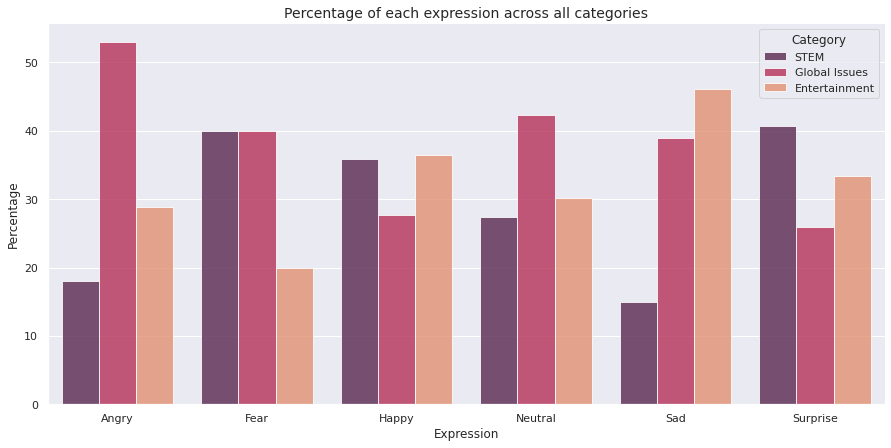

In [ ]:
#Percentage plot for each expression
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(15, 7)})
sns.barplot(x = 'Expression', y = 'Percentage', hue = 'Category', data = prop_df, palette = 'rocket', alpha = 0.8)
    
plt.title('Percentage of each expression across all categories', fontsize = 14)
sns.despine()

The above bar graph depicts the percentage wise distribution of each expression recognised by the model in various TED talk videos belonging to 3 categories: STEM, Global Issues and Entertainment. The model classified the images in the following expression classes: angry, fear, happy, neutral, sad and surprise.

**Inferences:**

* Almost $55\%$ of the images classified as expressing 'Anger' and $38\%$ of the images being classified as expressing 'Sadness' belong to the **Global Issues** category. Considering the fact that the talks covered in this category range from topics like domestic violence, climate crisis, war, and politics, it makes sense to obtain the stats that our model did.

* Approximately $45\%$ of the images classified as expressing 'Sadness' and $35\%$ of the images being classified as expressing 'Happy' belong to the **Entertainment** category. <br>When we used the TED website to get the list of top TED Talks of each category, we noticed that the folks at TED have a different view of what they find entertaining. For example, a video on a speaker talking about her life with cerebral palsy was a part of the entertainment category. So, we have inferred after some observation that what TED deems to be entertaining is what is generally considered as motivational, whether it be about the hard realities of life or a talk with more of an upbeat vibe. Hence, the high count of both 'Happy' and 'Sad' classes for images in the **Entertainment** category seems reasonable.

* The category **STEM** is equally distributed percent-wise in the classes 'Fear', 'Happy' and 'Surprise'.

### Top 10 images in each class across all categories

We'll further investigate all the expression classes. <br>
We start off by looking for the Top 10 images in each class across all categories, as ranked by their respective probabilities.

**1) Top 10 in class Angry**

In [ ]:
top10_angriest = 	tedtalks.nlargest(10, ['Angry Probability'])
top10_angriest.head(10)

Category                                      TED Talk Name  \
142  Entertainment                  The art of asking _ Amanda Palmer   
930  Global Issues          The Habits Of Happiness _ Matthieu Ricard   
146  Entertainment                  The art of asking _ Amanda Palmer   
990  Global Issues          The Habits Of Happiness _ Matthieu Ricard   
603  Entertainment           The art of misdirection _ Apollo Robbins   
35   Global Issues  How we must respond to the coronavirus pandemi...   
958  Global Issues          The Habits Of Happiness _ Matthieu Ricard   
968  Global Issues          The Habits Of Happiness _ Matthieu Ricard   
144  Entertainment  I got 99 problems... palsy is just one _ Mayso...   
580  Entertainment           The art of misdirection _ Apollo Robbins   

    Frame No. Face No.  Angry Probability  Fear Probability  \
142        58        1           0.598312          0.148616   
930        66        1           0.533978          0.189561   
146        43        1           0.523799          0.139799   
990        41        1           0.521083          0.182728   
603        41        1           0.510838          0.219033   
35          4        1           0.489743          0.167498   
958        54        1           0.489359          0.218251   
968        52        1           0.488660          0.194396   
144        36        1           0.487761          0.168339   
580        57        1           0.476914          0.192248   

     Happy Probability  Neutral Probability  Sad Probability  \
142           0.006278             0.030837         0.212079   
930           0.045999             0.031545         0.182717   
146           0.001918             0.054734         0.277699   
990           0.038423             0.037657         0.207140   
603           0.087613             0.021813         0.122825   
35            0.024763             0.052624         0.257379   
958           0.024272             0.044714         0.201214   
968           0.034736             0.047707         0.218672   
144           0.003492             0.063608         0.272012   
580           0.067609             0.040813         0.203323   

     Surprise Probability  Highest Probability  Predicted Class Expression  
142              0.003880             0.598312                0      Angry  
930              0.016201             0.533978                0      Angry  
146              0.002051             0.523799                0      Angry  
990              0.012969             0.521083                0      Angry  
603              0.037878             0.510838                0      Angry  
35               0.007993             0.489743                0      Angry  
958              0.022190             0.489359                0      Angry  
968              0.015830             0.488660                0      Angry  
144              0.004788             0.487761                0      Angry  
580              0.019092             0.476914                0      Angry

Amongst the Top 10 anger expressions, half of them were identified in videos from the **Global Issues** category and the other half from the **Entertainment** category.

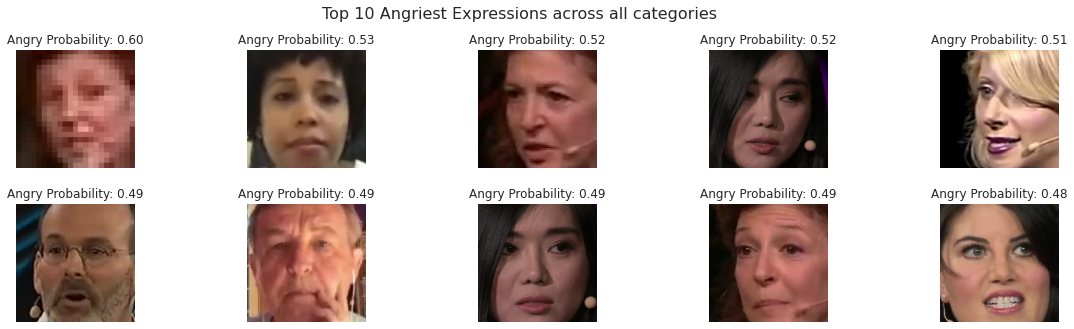

In [ ]:
# Plotting the images with the highest anger probability
anger_idx = top10_angriest.index

fig, ax = plt.subplots(2, 5, figsize = (20, 5))
ax = ax.ravel()

for i, idx in enumerate(anger_idx):
  ax[i].imshow(tedtalks_images[idx].reshape(250, 250, 3))
  ax[i].set_title(f"Angry Probability: {top10_angriest['Angry Probability'][idx]:.2f}", fontsize = 12)
  ax[i].grid(visible = None)
  ax[i].axis('off')

plt.suptitle('Top 10 Angriest Expressions across all categories', fontsize = 16, y = 1)
plt.subplots_adjust(hspace = 0.3, wspace = 0.2)

**2) Top 10 in class Fear**

In [ ]:
top10_fear = 	tedtalks.nlargest(10, ['Fear Probability'])
top10_fear.head(10)

Category                                      TED Talk Name  \
224  Global Issues     Hyeonseo Lee_ My escape from North Korea _ TED   
655  Global Issues  6 Ways Mushrooms Can Save The World _ Paul Sta...   
831  Entertainment   Your Elusive Creative Genius _ Elizabeth Gilbert   
115  Entertainment                  The art of asking _ Amanda Palmer   
581           STEM                  How To Spot A Liar _ Pamela Meyer   
842  Entertainment  Tim Urban_ Inside the mind of a master procras...   
52            STEM               The price of shame _ Monica Lewinsky   
580           STEM                  How To Spot A Liar _ Pamela Meyer   
841  Entertainment  Tim Urban_ Inside the mind of a master procras...   
207  Entertainment  I got 99 problems... palsy is just one _ Mayso...   

    Frame No. Face No.  Angry Probability  Fear Probability  \
224        66        1           0.240829          0.316971   
655        39        1           0.189495          0.309585   
831        95        1           0.148882          0.294030   
115        11        1           0.302681          0.294025   
581        23        1           0.309894          0.292540   
842        28        1           0.151493          0.288637   
52         54        1           0.200192          0.287590   
580        13        1           0.255855          0.287059   
841        70        1           0.151896          0.283497   
207        34        1           0.269421          0.283351   

     Happy Probability  Neutral Probability  Sad Probability  \
224           0.030400             0.082926         0.150990   
655           0.056710             0.080112         0.128166   
831           0.031507             0.106320         0.120309   
115           0.023409             0.091862         0.203458   
581           0.114918             0.027722         0.083403   
842           0.009407             0.198917         0.194595   
52            0.082833             0.092645         0.142238   
580           0.128517             0.041435         0.096479   
841           0.017373             0.181584         0.182808   
207           0.107136             0.060278         0.131402   

     Surprise Probability  Highest Probability  Predicted Class Expression  
224              0.177884             0.316971                1       Fear  
655              0.235933             0.309585                1       Fear  
831              0.298953             0.298953                5   Surprise  
115              0.084565             0.302681                0      Angry  
581              0.171523             0.309894                0      Angry  
842              0.156950             0.288637                1       Fear  
52               0.194502             0.287590                1       Fear  
580              0.190656             0.287059                1       Fear  
841              0.182842             0.283497                1       Fear  
207              0.148412             0.283351                1       Fear

Observe that not all of the images above have been classified as 'Fear', despite having a high probability in comparison to the rest.

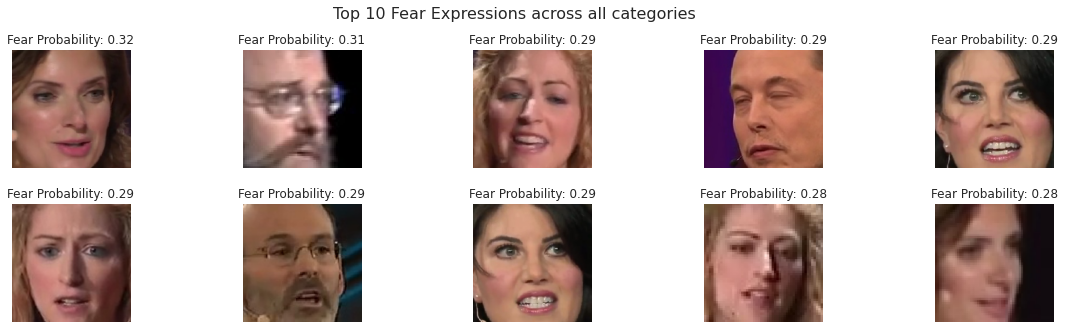

In [ ]:
# Plotting the images with the highest fear probability
fear_idx = top10_fear.index

fig, ax = plt.subplots(2, 5, figsize = (20, 5))
ax = ax.ravel()

for i, idx in enumerate(fear_idx):
  ax[i].imshow(tedtalks_images[idx].reshape(250, 250, 3))
  ax[i].set_title(f"Fear Probability: {top10_fear['Fear Probability'][idx]:.2f}", fontsize = 12)
  ax[i].grid(visible = None)
  ax[i].axis('off')

plt.suptitle('Top 10 Fear Expressions across all categories', fontsize = 16, y = 1)
plt.subplots_adjust(hspace = 0.3, wspace = 0.2)

**3) Top 10 in class Happy**

In [ ]:
top10_happiest = 	tedtalks.nlargest(10, ['Happy Probability'])
top10_happiest.head(10)

Category                                      TED Talk Name  \
833  Entertainment  Tim Urban_ Inside the mind of a master procras...   
536           STEM                  How To Spot A Liar _ Pamela Meyer   
85   Entertainment        A 12-year-old app developer _ Thomas Suarez   
824  Entertainment  Tim Urban_ Inside the mind of a master procras...   
618           STEM                  How To Spot A Liar _ Pamela Meyer   
87   Entertainment                  The art of asking _ Amanda Palmer   
124  Entertainment                  The art of asking _ Amanda Palmer   
220  Entertainment  I got 99 problems... palsy is just one _ Mayso...   
681  Entertainment  Secrets Of Success In 8 Words, 3 Minutes _ Ric...   
456  Global Issues   Are We In Control Of Our Decisions_ _ Dan Ariely   

    Frame No. Face No.  Angry Probability  Fear Probability  \
833        42        1           0.002406          0.003052   
536        70        1           0.002122          0.002130   
85         50        1           0.002013          0.002409   
824        81        1           0.003161          0.003602   
618        18        1           0.006997          0.007666   
87         96        1           0.006601          0.009000   
124         1        1           0.005659          0.008048   
220        18        1           0.007964          0.011173   
681        13        1           0.004231          0.005788   
456        42        1           0.009646          0.008028   

     Happy Probability  Neutral Probability  Sad Probability  \
833           0.984184             0.006664         0.001980   
536           0.982698             0.009833         0.002418   
85            0.980703             0.011373         0.002358   
824           0.973175             0.014666         0.003778   
618           0.961847             0.013740         0.006039   
87            0.961798             0.011557         0.004660   
124           0.957093             0.018260         0.005584   
220           0.955241             0.011858         0.005140   
681           0.955147             0.025846         0.005777   
456           0.954325             0.016495         0.008838   

     Surprise Probability  Highest Probability  Predicted Class Expression  
833              0.001714             0.984184                2      Happy  
536              0.000800             0.982698                2      Happy  
85               0.001145             0.980703                2      Happy  
824              0.001618             0.973175                2      Happy  
618              0.003711             0.961847                2      Happy  
87               0.006384             0.961798                2      Happy  
124              0.005355             0.957093                2      Happy  
220              0.008624             0.955241                2      Happy  
681              0.003211             0.955147                2      Happy  
456              0.002668             0.954325                2      Happy

The Top 10 Happy leaderboard is dominated by the **Entertainment** category. We'll plot these images to look how joyful the expressions really were.

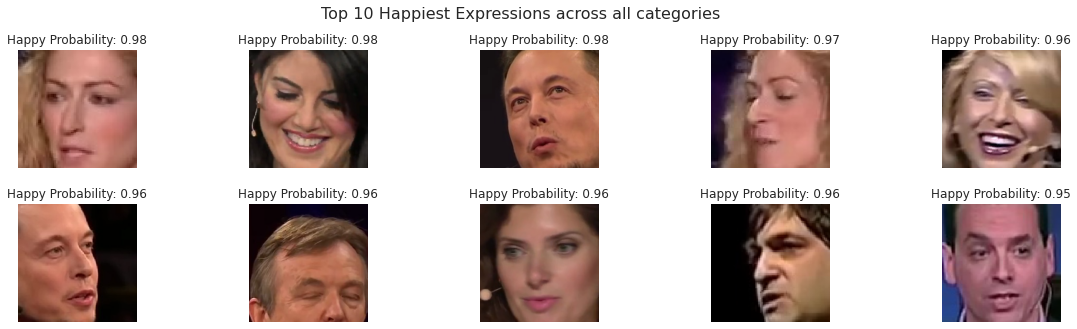

In [ ]:
# Plotting the images with the highest happy probability
happy_idx = top10_happiest.index

fig, ax = plt.subplots(2, 5, figsize = (20, 5))
ax = ax.ravel()

for i, idx in enumerate(happy_idx):
  ax[i].imshow(tedtalks_images[idx].reshape(250, 250, 3))
  ax[i].set_title(f"Happy Probability: {top10_happiest['Happy Probability'][idx]:.2f}", fontsize = 12)
  ax[i].grid(visible = None)
  ax[i].axis('off')

plt.suptitle('Top 10 Happiest Expressions across all categories', fontsize = 16, y = 1)
plt.subplots_adjust(hspace = 0.3, wspace = 0.2)

**4) Top 10 in class Neutral**

In [ ]:
top10_neutral = 	tedtalks.nlargest(10, ['Neutral Probability'])
top10_neutral.head(10)

Category                                      TED Talk Name  \
773  Global Issues    Science Can Answer Moral Questions _ Sam Harris   
192  Entertainment                          Brain Magic _ Keith Barry   
802  Global Issues    Science Can Answer Moral Questions _ Sam Harris   
62            STEM               The price of shame _ Monica Lewinsky   
822  Global Issues  Why domestic violence victims don_t leave _ Le...   
244  Entertainment               Learning From Dirty Jobs _ Mike Rowe   
58            STEM               The price of shame _ Monica Lewinsky   
825  Global Issues  Why domestic violence victims don_t leave _ Le...   
828  Global Issues  Why domestic violence victims don_t leave _ Le...   
57            STEM               The price of shame _ Monica Lewinsky   

    Frame No. Face No.  Angry Probability  Fear Probability  \
773        87        1           0.013344          0.019550   
192        53        1           0.014037          0.015885   
802        23        1           0.016134          0.033484   
62         62        1           0.018866          0.028313   
822        77        1           0.015163          0.034383   
244        79        1           0.023501          0.027765   
58          1        1           0.021503          0.024832   
825        32        1           0.022049          0.035384   
828        78        1           0.022372          0.034974   
57         20        1           0.024382          0.030305   

     Happy Probability  Neutral Probability  Sad Probability  \
773           0.009039             0.916119         0.039428   
192           0.019539             0.910035         0.038913   
802           0.004765             0.891426         0.045566   
62            0.014732             0.880933         0.052612   
822           0.018225             0.876097         0.043353   
244           0.007016             0.875131         0.064377   
58            0.020385             0.873233         0.057437   
825           0.004512             0.872862         0.060121   
828           0.011075             0.864937         0.060712   
57            0.016824             0.860264         0.064704   

     Surprise Probability  Highest Probability  Predicted Class Expression  
773              0.002520             0.916119                3    Neutral  
192              0.001590             0.910035                3    Neutral  
802              0.008624             0.891426                3    Neutral  
62               0.004544             0.880933                3    Neutral  
822              0.012779             0.876097                3    Neutral  
244              0.002210             0.875131                3    Neutral  
58               0.002610             0.873233                3    Neutral  
825              0.005072             0.872862                3    Neutral  
828              0.005930             0.864937                3    Neutral  
57               0.003522             0.860264                3    Neutral

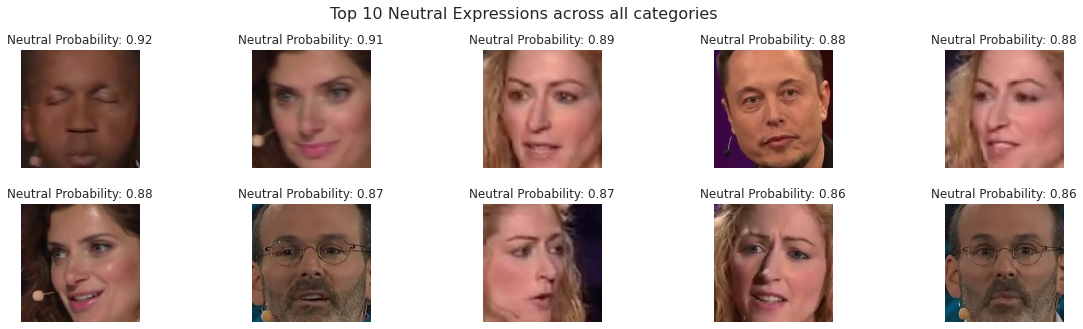

In [ ]:
# Plotting the images with the highest neutral probability
neutral_idx = top10_neutral.index

fig, ax = plt.subplots(2, 5, figsize = (20, 5))
ax = ax.ravel()

for i, idx in enumerate(neutral_idx):
  ax[i].imshow(tedtalks_images[idx].reshape(250, 250, 3))
  ax[i].set_title(f"Neutral Probability: {top10_neutral['Neutral Probability'][idx]:.2f}", fontsize = 12)
  ax[i].grid(visible = None)
  ax[i].axis('off')

plt.suptitle('Top 10 Neutral Expressions across all categories', fontsize = 16, y = 1)
plt.subplots_adjust(hspace = 0.3, wspace = 0.2)

**5) Top 10 in class Sad**

In [ ]:
top10_saddest = 	tedtalks.nlargest(10, ['Sad Probability'])
top10_saddest.head(10)

Category                                      TED Talk Name  \
437  Entertainment  Thoughts on humanity, fame and love _ Shah Ruk...   
321  Entertainment  I got 99 problems... palsy is just one _ Mayso...   
318  Entertainment                My journey to yo-yo mastery _ BLACK   
670  Entertainment  Secrets Of Success In 8 Words, 3 Minutes _ Ric...   
540  Entertainment          Tom Thum_ The orchestra in my mouth _ TED   
445  Entertainment  Thoughts on humanity, fame and love _ Shah Ruk...   
354  Entertainment  I got 99 problems... palsy is just one _ Mayso...   
317           STEM  Elon Musk_ The future we_re building -- and bo...   
423  Global Issues           My Stroke Of Insight _ Jill Bolte Taylor   
531  Entertainment      My journey from Marine to actor _ Adam Driver   

    Frame No. Face No.  Angry Probability  Fear Probability  \
437         7        1           0.256591          0.112304   
321        68        1           0.241036          0.112544   
318        92        1           0.302223          0.120740   
670        16        1           0.250219          0.098792   
540        18        1           0.265283          0.124187   
445        65        1           0.297638          0.115349   
354        88        8           0.241965          0.122662   
317        39        1           0.265101          0.126983   
423        71        1           0.265101          0.126983   
531        90        1           0.244426          0.115041   

     Happy Probability  Neutral Probability  Sad Probability  \
437           0.046344             0.164954         0.416612   
321           0.038767             0.188832         0.415609   
318           0.027053             0.134188         0.412886   
670           0.055899             0.181821         0.410946   
540           0.024689             0.171993         0.410295   
445           0.013599             0.163905         0.407413   
354           0.037175             0.188236         0.405664   
317           0.018626             0.182495         0.403237   
423           0.018626             0.182495         0.403237   
531           0.046035             0.188488         0.402254   

     Surprise Probability  Highest Probability  Predicted Class Expression  
437              0.003195             0.416612                4        Sad  
321              0.003213             0.415609                4        Sad  
318              0.002910             0.412886                4        Sad  
670              0.002323             0.410946                4        Sad  
540              0.003553             0.410295                4        Sad  
445              0.002097             0.407413                4        Sad  
354              0.004299             0.405664                4        Sad  
317              0.003559             0.403237                4        Sad  
423              0.003559             0.403237                4        Sad  
531              0.003756             0.402254                4        Sad

Once again, the category **Entertainment** is dominating the Top 10 leaderboard. We'll plot these images to check out what our model considered as sad.

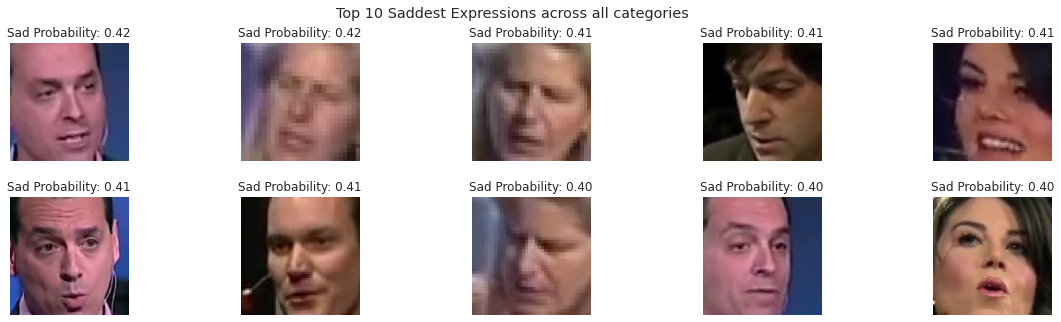

In [ ]:
# Plotting the images with the highest sad probability
sad_idx = top10_saddest.index

fig, ax = plt.subplots(2, 5, figsize = (20, 5))
ax = ax.ravel()

for i, idx in enumerate(sad_idx):
  ax[i].imshow(tedtalks_images[idx].reshape(250, 250, 3))
  ax[i].set_title(f"Sad Probability: {top10_saddest['Sad Probability'][idx]:.2f}", fontsize = 12)
  ax[i].grid(visible = None)
  ax[i].axis('off')

plt.suptitle('Top 10 Saddest Expressions across all categories')
plt.subplots_adjust(hspace = 0.3, wspace = 0.2)

**6) Top 10 in class Surprise**

In [ ]:
top10_surprise = 	tedtalks.nlargest(10, ['Surprise Probability'])
top10_surprise.head(10)

Category                                      TED Talk Name  \
306  Entertainment  I got 99 problems... palsy is just one _ Mayso...   
914  Entertainment   Your Elusive Creative Genius _ Elizabeth Gilbert   
500           STEM  The Thrilling Potential Of SixthSense Technolo...   
503           STEM  Your body language may shape who you are _ Amy...   
263  Global Issues  The War in Ukraine Could Change Everything _ Y...   
287           STEM  Elon Musk_ The future we_re building -- and bo...   
919  Entertainment   Your Elusive Creative Genius _ Elizabeth Gilbert   
530           STEM  The Surprising Science Of Happiness _ Dan Gilb...   
576           STEM  Mary Roach 10 Things you didn_t know about an ...   
430           STEM               The Puzzle Of Motivation _ Dan Pink    

    Frame No. Face No.  Angry Probability  Fear Probability  \
306        78        1           0.030656          0.188976   
914        13        1           0.028099          0.181720   
500         5        1           0.052680          0.236725   
503        62        1           0.040710          0.218218   
263        94        1           0.076398          0.249672   
287        86        1           0.073096          0.253031   
919        22        1           0.027459          0.160599   
530        13        1           0.108930          0.277707   
576        90        1           0.072815          0.249822   
430        35        1           0.062731          0.199015   

     Happy Probability  Neutral Probability  Sad Probability  \
306           0.033315             0.073785         0.038446   
914           0.024525             0.124054         0.050861   
500           0.013198             0.074388         0.056635   
503           0.002578             0.152591         0.066968   
263           0.051220             0.090236         0.074895   
287           0.038620             0.100320         0.081788   
919           0.013884             0.285783         0.061665   
530           0.053601             0.051629         0.062115   
576           0.032257             0.113882         0.086615   
430           0.238734             0.059720         0.045018   

     Surprise Probability  Highest Probability  Predicted Class Expression  
306              0.634822             0.634822                5   Surprise  
914              0.590741             0.590741                5   Surprise  
500              0.566374             0.566374                5   Surprise  
503              0.518935             0.518935                5   Surprise  
263              0.457578             0.457578                5   Surprise  
287              0.453146             0.453146                5   Surprise  
919              0.450611             0.450611                5   Surprise  
530              0.446018             0.446018                5   Surprise  
576              0.444609             0.444609                5   Surprise  
430              0.394781             0.394781                5   Surprise

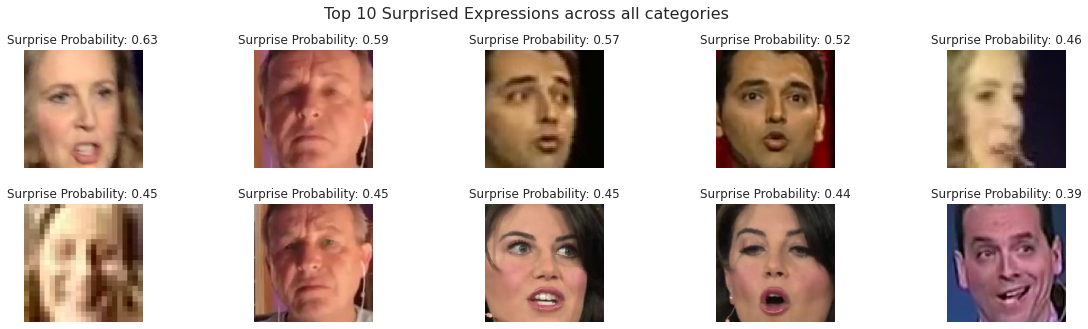

In [ ]:
# Plotting the images with the highest surprise probability
surprise_idx = top10_surprise.index

fig, ax = plt.subplots(2, 5, figsize = (20, 5))
ax = ax.ravel()

for i, idx in enumerate(surprise_idx):
  ax[i].imshow(tedtalks_images[idx].reshape(250, 250, 3))
  ax[i].set_title(f"Surprise Probability: {top10_surprise['Surprise Probability'][idx]:.2f}", fontsize = 12)
  ax[i].grid(visible = None)
  ax[i].axis('off')

plt.suptitle('Top 10 Surprised Expressions across all categories', fontsize = 16, y = 1)
plt.subplots_adjust(hspace = 0.3, wspace = 0.2)

### Summary

To summarise, we'll:
* Calculate the average probability of each expression class for each TED Talk video
* Calculate the average probability of each expression class for each category

In [ ]:
#Avg probability for all classes grouped by TED Talk name
gby_talk = tedtalks.groupby('TED Talk Name')['Angry Probability', 'Fear Probability', 'Happy Probability', 'Neutral Probability', 'Sad Probability', 'Surprise Probability'].mean()

In [ ]:
print('The average probability of each expression class for each TED Talk video is as shown:\n')
display(gby_talk)

The average probability of each expression class for each TED Talk video is as shown:



Angry Probability  \
TED Talk Name                                                           
6 Ways Mushrooms Can Save The World _ Paul Stamets           0.160295   
A 12-year-old app developer _ Thomas Suarez                  0.187834   
A Saudi, an Indian and an Iranian walk into a Q...           0.157789   
A simple way to break a bad habit _ Judson Brewer            0.127035   
Are We In Control Of Our Decisions_ _ Dan Ariely             0.149455   
Bill Gates_ The next outbreak_ Weâre not rea...           0.128740   
Brain Magic _ Keith Barry                                    0.128463   
Bryan Stevenson_ We need to talk about an injus...           0.130262   
Elon Musk_ The future we_re building -- and bor...           0.168859   
Gaming Can Make A Better World _ Jane McGonigal              0.148275   
How To Spot A Liar _ Pamela Meyer                            0.118672   
How To Start A Movement _ Derek Sivers                       0.154303   
How language shapes the way we think _ Lera Bor...           0.122492   
How we must respond to the coronavirus pandemic...           0.187765   
Hyeonseo Lee_ My escape from North Korea _ TED               0.118537   
I got 99 problems... palsy is just one _ Maysoo...           0.134102   
If I Should Have A Daughter ... _ Sarah Kay                  0.178591   
Innovating To Zero! _ Bill Gates                             0.141791   
Learning From Dirty Jobs _ Mike Rowe                         0.130749   
Lightning Calculation And Other _Mathemagic_ _ ...           0.151468   
Mary Roach 10 Things you didn_t know about an o...           0.119748   
Mihaly Csikszentmihalyi- Flow, The Secret To Ha...           0.172017   
My Stroke Of Insight _ Jill Bolte Taylor                     0.161156   
My journey from Marine to actor _ Adam Driver                0.162601   
My journey to yo-yo mastery _ BLACK                          0.191920   
Reggie Watts disorients you in the most enterta...           0.206657   
Science Can Answer Moral Questions _ Sam Harris              0.068264   
Secrets Of Success In 8 Words, 3 Minutes _ Rich...           0.165130   
Teach Every Child About Food _ Jamie Oliver                  0.272198   
The Best Stats You_ve Ever Seen _ Hans Rosling               0.157739   
The Habits Of Happiness _ Matthieu Ricard                    0.242480   
The Happy Secret To Better Work _ Shawn Achor                0.108152   
The Psychology Of Evil _ Philip Zimbardo                     0.169902   
The Puzzle Of Motivation _ Dan Pink                          0.110685   
The Surprising Science Of Happiness _ Dan Gilbert            0.114410   
The Thrilling Potential Of SixthSense Technolog...           0.138220   
The Transformative Power Of Classical Music _ B...           0.150873   
The War in Ukraine Could Change Everything _ Yu...           0.116381   
The art of asking _ Amanda Palmer                            0.187820   
The art of misdirection _ Apollo Robbins                     0.164016   
The price of shame _ Monica Lewinsky                         0.101586   
Thoughts on humanity, fame and love _ Shah Rukh...           0.175594   
Tim Urban_ Inside the mind of a master procrast...           0.149498   
Tom Thum_ The orchestra in my mouth _ TED                    0.220413   
What really matters at the end of life _ BJ Miller           0.131431   
Which country does the most good for the world_...           0.121734   
Why domestic violence victims don_t leave _ Les...           0.176740   
Your Elusive Creative Genius _ Elizabeth Gilbert             0.094246   
Your body language may shape who you are _ Amy ...           0.130013   
Your kids might live on Mars. Here_s how they_l...           0.156345   

                                                    Fear Probability  \
TED Talk Name                                                          
6 Ways Mushrooms Can Save The World _ Paul Stamets          0.120493   
A 12-year-old app developer _ Thomas Sua

In [ ]:
#Avg probability for all classes grouped by category
gby_cat = tedtalks.groupby('Category')['Angry Probability', 'Fear Probability', 'Happy Probability', 'Neutral Probability', 'Sad Probability', 'Surprise Probability'].mean()

In [ ]:
print('The average probability of each expression class for each category is as shown:\n')
display(gby_cat)

The average probability of each expression class for each category is as shown:



Angry Probability  Fear Probability  Happy Probability  \
Category                                                                
Entertainment           0.158432          0.111891           0.127401   
Global Issues           0.155863          0.119111           0.104983   
STEM                    0.124748          0.113391           0.161715   

               Neutral Probability  Sad Probability  Surprise Probability  
Category                                                                   
Entertainment             0.326794         0.254197              0.021284  
Global Issues             0.353372         0.245389              0.021282  
STEM                      0.363929         0.203699              0.032518

**Inferences:**<br>
When averaged like this, no particular expression seems to be dominating a particular category. This is sensible because no person would be constantly making the same expression throughout their talk. The highest average probability is of the class neutral, which aligns with how human expressions in the wild are. <br>
The second highest average probability is of the class 'Sad'. This is because many of the images have the speaker with their eyes looking down and as [this](https://www.writerswrite.co.za/body-language-eyes/) body language article says, 'People also tend to look down when they are upset, or trying to hide something emotional'. To be clear, in no way are we claiming that the speakers are sad. It just seems like the downward glance could be the cause behind the images getting a relatively high sad probability.

In [ ]:
#Saving groupby talk name df to drive
gby_talk.to_csv('gby_talk.csv')
!cp gby_talk.csv '/content/drive/MyDrive/TED talks csvs'

In [ ]:
#Saving groupby category df drive
gby_cat.to_csv('gby_cat.csv')
!cp gby_cat.csv '/content/drive/MyDrive/TED talks csvs'

# Concluding Remarks

In [ ]:
# displaying final project poster
!gdown 1gP3MwQdJZ5XnCTQl3Pg3MizwmKCbi7aS

Downloading...
From: https://drive.google.com/uc?id=1gP3MwQdJZ5XnCTQl3Pg3MizwmKCbi7aS
To: /content/AI_2_project_poster.jpg
100% 1.54M/1.54M [00:00<00:00, 175MB/s]


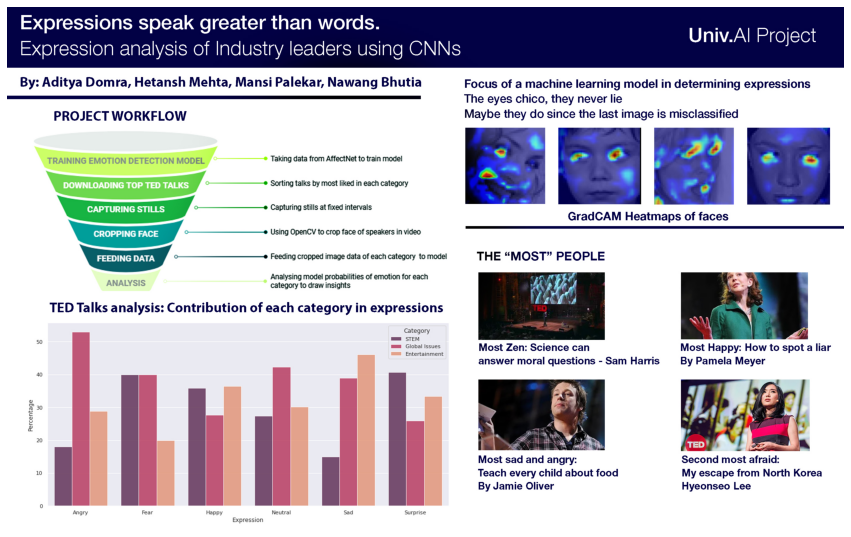

In [ ]:
img = mpimg.imread('/content/AI_2_project_poster.jpg')
plt.figure(figsize = (15, 10))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

From this project we have gained numerous interesting insights, the top insights are as follows:

In [ ]:
# displaying insights graphic
!gdown 1ZLiGuS5FdgQYCLG27skvVtYSBABHlwUy

Downloading...
From: https://drive.google.com/uc?id=1ZLiGuS5FdgQYCLG27skvVtYSBABHlwUy
To: /content/Screenshot 2022-07-28 at 11.01.45 PM.png
100% 1.33M/1.33M [00:00<00:00, 130MB/s]


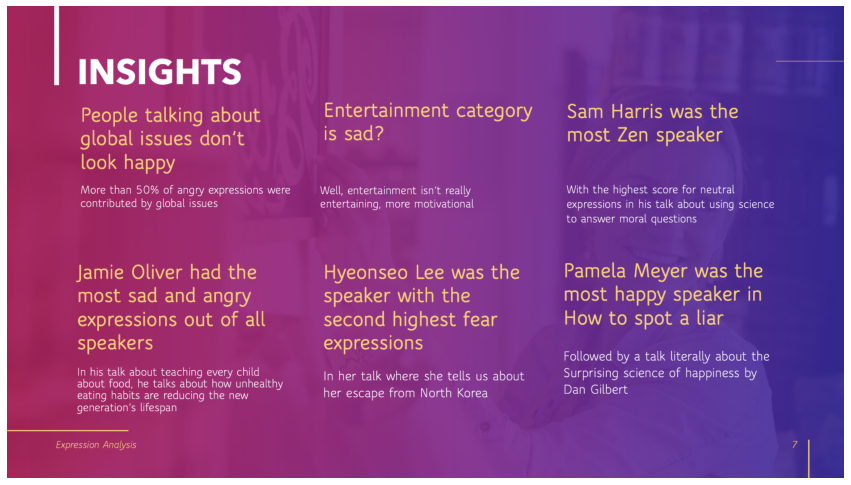

In [ ]:
img = mpimg.imread('/content/Screenshot 2022-07-28 at 11.01.45 PM.png')
plt.figure(figsize = (15, 10))
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

## Future scope of work

As for the future scope, instead of taking 100 frames from a video, with more processing power we could process a video frame by frame for better results and instead of using the top 20 videos from 3 categories, we can expand our categories and use more videos per category

Thanks and hope you liked our project!